## Google Drive Mount

- account: leeyeoreum01@gmail.com

In [1]:
from google.colab import drive   # colab 사용시 mount 하기 위한 용도. local 에서는 불필요

drive.mount('/content/gdrive/')  # colab 사용시 mount 하기 위한 용도. local 에서는 불필요

Mounted at /content/gdrive/


## Google Drive Working Directory Select

- csv_file_dir = 'tensorflow_2.x_working_dir'
- ipynb_file_dir = 'Colab Notebooks'

In [2]:
%tensorflow_version 1.x

import tensorflow as tf
import os
from datetime import datetime
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np


working_dir = 'tensorflow_2.x_working_dir'

colab_default_dir = '/content/gdrive/My Drive/Colab Notebooks/'

original_dir = os.getcwd()

try:

  os.chdir(colab_default_dir)

  if not os.path.exists(working_dir):
    os.mkdir(working_dir)

  os.chdir(working_dir)
  print("current dir = ", os.getcwd())

except Exception as err:
  
  os.chdir(original_dir)
  print(str(err))

TensorFlow 1.x selected.
current dir =  /content/gdrive/My Drive/Colab Notebooks/tensorflow_2.x_working_dir


## File Upload From Google Drive Working Directory

- titanic_train.csv
- titanic_test.csv

In [3]:
try:
  
  original_train_df = pd.read_csv('./titanic_train.csv')
  original_test_df = pd.read_csv('./titanic_test.csv')

  print("original_train_df.shape = ", original_train_df.shape, ", original_test_df.shape = ", original_test_df.shape)

except Exception as err:
  
  print(str(err))

original_train_df.shape =  (891, 12) , original_test_df.shape =  (418, 11)


In [4]:
original_train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
original_test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## CSV File Preprocessing

- Using row
> [ [ 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' ] ]
- transforming non-float data to float data ('Sex' row)
- processing missing data
> - 'Age' row -> mean value
> - 'Fare' row -> median value



In [6]:
print("[original_train_df.isnull().sum()]\n", original_train_df.isnull().sum())
print("\n\n[original_test_df.isnull().sum()]\n", original_test_df.isnull().sum())

[original_train_df.isnull().sum()]
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


[original_test_df.isnull().sum()]
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [7]:
train_df = original_train_df.copy()[ ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'] ]

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [8]:
test_df = original_test_df.copy()[ ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'] ]

test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,34.5,0,0,7.8292
1,3,female,47.0,1,0,7.0000
2,2,male,62.0,0,0,9.6875
3,3,male,27.0,0,0,8.6625
4,3,female,22.0,1,1,12.2875


In [9]:
print("[train_df.isnull().sum()]\n", train_df.isnull().sum())
print("\n\n[test_df.isnull().sum()]\n", test_df.isnull().sum())

[train_df.isnull().sum()]
 Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64


[test_df.isnull().sum()]
 Pclass     0
Sex        0
Age       86
SibSp      0
Parch      0
Fare       1
dtype: int64


In [10]:
train_df["Sex"] = train_df["Sex"].apply(lambda x: 0 if x == "male" else 1)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [11]:
test_df["Sex"] = test_df["Sex"].apply(lambda x: 0 if x == "male" else 1)

test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,34.5,0,0,7.8292
1,3,1,47.0,1,0,7.0000
2,2,0,62.0,0,0,9.6875
3,3,0,27.0,0,0,8.6625
4,3,1,22.0,1,1,12.2875


In [12]:
print("train_df Age mean = ", train_df['Age'].mean())
print("train_df Age median = ", train_df['Age'].median())

print("\ntest_df Age mean = ", test_df['Age'].mean())
print("test_df Age median = ", test_df['Age'].median())
print("test_df Fare mean = ", train_df['Fare'].mean())
print("test_df Fare median = ", train_df['Fare'].median())

train_df Age mean =  29.69911764705882
train_df Age median =  28.0

test_df Age mean =  30.272590361445783
test_df Age median =  27.0
test_df Fare mean =  32.2042079685746
test_df Fare median =  14.4542


In [13]:
train_df['Age'].fillna(float(train_df['Age'].mean()), inplace=True)

print("[train_df.isnull().sum()]\n", train_df.isnull().sum(), "\n")

train_df

[train_df.isnull().sum()]
 Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64 



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.000000,1,0,7.2500
1,1,1,1,38.000000,1,0,71.2833
2,1,3,1,26.000000,0,0,7.9250
3,1,1,1,35.000000,1,0,53.1000
4,0,3,0,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000
887,1,1,1,19.000000,0,0,30.0000
888,0,3,1,29.699118,1,2,23.4500
889,1,1,0,26.000000,0,0,30.0000


In [14]:
test_df['Age'].fillna(float(test_df['Age'].mean()), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

print("[test_df.isnull().sum()]\n", test_df.isnull().sum(), "\n")

test_df

[test_df.isnull().sum()]
 Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64 



,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,34.50000,0,0,7.8292
1,3,1,47.00000,1,0,7.0000
2,2,0,62.00000,0,0,9.6875
3,3,0,27.00000,0,0,8.6625
4,3,1,22.00000,1,1,12.2875
...,...,...,...,...,...,...
413,3,0,30.27259,0,0,8.0500
414,1,1,39.00000,0,0,108.9000
415,3,0,38.50000,0,0,7.2500
416,3,0,30.27259,0,0,8.0500


## Data Generation

- train data : 70%
- test data : 30%

- Normalization (+ unknown data (<- test df)): False

In [15]:
class DataGeneration:
    
    # target_position = 0 (첫번째열이 정답데이터), target_position=-1 (마지막열이 정답데이터)
    def __init__(self, file, seperation_rate, target_position=-1):
        
        self.file = file
        
        self.seperation_rate = seperation_rate
        
        if (target_position == -1  or  target_position == 0):      
            self.target_position = target_position
        
        else:
            err_str = 'target_position must be -1 or 0'            
            raise Exception(err_str)    
            
    
    # print data target distribution 
    # str_of_kind : 'original data' or  'training data'  or  'test data'
    def __display_target_distribution(self, data, str_of_kind='original data'):
        
        print('=======================================================================================================')
        
        target_data = data[ :, self.target_position ]
        
        # numpy.unique() 사용하여 loaded data target 분포 확인
        unique, counts = np.unique(target_data, return_counts=True)

        unique_target = []
    
        for index in range(len(unique)):
        
            print('[DataGeneration] unique number of ' + str_of_kind + ' = ', unique[index], ', count = ', counts[index])
        
            unique_target.append(unique[index])

        for index in range(len(unique_target)):
        
            print('[DataGeneration] unique number of ' + str_of_kind + ' = ', unique_target[index], ', ratio = ', np.round(100 * counts[index] / (target_data.shape[0]), 2), ' %')
    
        print('=======================================================================================================')
        
        
    # numpy.random.shuffle()  이용하여 training_data / test_data 생성
    def generate(self):
    
        # 데이터 불러오기, 파일이 없는 경우 exception 발생

        loaded_data = self.file

        print("[DataGeneration]  loaded_data.shape = ", loaded_data.shape)
            
        # print the target distribution of original data 
        
        self.__display_target_distribution(loaded_data, 'original data')
        
        
        # 분리비율에 맞게 테스트데이터로 분리
        total_data_num = len(loaded_data)
        test_data_num = int(len(loaded_data) * self.seperation_rate)

        # numpy.random.shuffle 을 이용하여 랜덤하게 데이터 섞기
        np.random.shuffle(loaded_data)
        
        # test_data 는 0 : test_data_num
        
        
        test_data = loaded_data[ 0:test_data_num ]

        # training_data 는 test_data_num 부터 끝까지 
        training_data = loaded_data[ test_data_num: ]

        # display target distribution of generated data 
        
        self.__display_target_distribution(training_data, 'training data')
        
        self.__display_target_distribution(test_data, 'test data')
        
        return training_data, test_data

In [16]:
# DataGeneration class 이용하여 training data , validation data, test data 생성

data = np.array(train_df) # 학습 데이터프레임
unknown_data = np.array(test_df) # 예측 데이터프레임

data_obj = DataGeneration(data, seperation_rate=0.3, target_position=0)
(training_data, test_data) = data_obj.generate()

print("training_data.shape = ", training_data.shape)
print("test_data.shape = ", test_data.shape)

[DataGeneration]  loaded_data.shape =  (891, 7)
[DataGeneration] unique number of original data =  0.0 , count =  549
[DataGeneration] unique number of original data =  1.0 , count =  342
[DataGeneration] unique number of original data =  0.0 , ratio =  61.62  %
[DataGeneration] unique number of original data =  1.0 , ratio =  38.38  %
[DataGeneration] unique number of training data =  0.0 , count =  391
[DataGeneration] unique number of training data =  1.0 , count =  233
[DataGeneration] unique number of training data =  0.0 , ratio =  62.66  %
[DataGeneration] unique number of training data =  1.0 , ratio =  37.34  %
[DataGeneration] unique number of test data =  0.0 , count =  158
[DataGeneration] unique number of test data =  1.0 , count =  109
[DataGeneration] unique number of test data =  0.0 , ratio =  59.18  %
[DataGeneration] unique number of test data =  1.0 , ratio =  40.82  %
training_data.shape =  (624, 7)
test_data.shape =  (267, 7)


In [17]:
training_xdata = training_data[ :  , 1:]
training_tdata = training_data[ :  , [0]]

test_xdata = test_data[ :  , 1:]
test_tdata = test_data[ :  , [0]]

print("training_xdata = ", training_xdata.shape, ", training_tdata = ", training_tdata.shape)
print("test_xdata = ", test_xdata.shape, ", test_tdata = ", test_tdata.shape)

training_xdata =  (624, 6) , training_tdata =  (624, 1)
test_xdata =  (267, 6) , test_tdata =  (267, 1)


In [18]:
# 정규화(Normalization) 코드

def data_normalization(data):
  
  try:

    if data.ndim != 2:
      raise Exception("Warning: input data must be 2 dim!!")

    for i in range(len(data)):
      for j in range(len(data[i])):
        data[i, j] = (data[i, j] - np.min(data)) / (np.max(data) - np.min(data))

    return data

  except Exception as err:
    raise Exception
'''
try:
  data_normalization(training_xdata)
  data_normalization(validation_xdata)
  data_normalization(test_xdata)
  data_normalization(unknown_data)

except Exception as err:
  print(str(err))
'''

'\ntry:\n  data_normalization(training_xdata)\n  data_normalization(validation_xdata)\n  data_normalization(test_xdata)\n  data_normalization(unknown_data)\n\nexcept Exception as err:\n  print(str(err))\n'

In [19]:
training_xdata

array([[ 2.        ,  0.        , 50.        ,  0.        ,  0.        ,
        13.        ],
       [ 1.        ,  1.        , 36.        ,  0.        ,  2.        ,
        71.        ],
       [ 2.        ,  0.        , 29.69911765,  0.        ,  0.        ,
         0.        ],
       ...,
       [ 2.        ,  0.        , 24.        ,  0.        ,  0.        ,
        10.5       ],
       [ 3.        ,  0.        , 33.        ,  0.        ,  0.        ,
         7.8958    ],
       [ 1.        ,  1.        , 33.        ,  1.        ,  0.        ,
        90.        ]])

In [20]:
test_xdata

array([[ 2.        ,  0.        , 34.        ,  0.        ,  0.        ,
        13.        ],
       [ 2.        ,  0.        , 34.        ,  0.        ,  0.        ,
        13.        ],
       [ 3.        ,  0.        , 21.        ,  0.        ,  0.        ,
         7.7333    ],
       ...,
       [ 3.        ,  0.        , 21.        ,  0.        ,  0.        ,
         7.775     ],
       [ 1.        ,  1.        , 49.        ,  1.        ,  0.        ,
        76.7292    ],
       [ 3.        ,  1.        , 29.69911765,  1.        ,  0.        ,
        15.5       ]])

In [21]:
unknown_data

array([[ 3.        ,  0.        , 34.5       ,  0.        ,  0.        ,
         7.8292    ],
       [ 3.        ,  1.        , 47.        ,  1.        ,  0.        ,
         7.        ],
       [ 2.        ,  0.        , 62.        ,  0.        ,  0.        ,
         9.6875    ],
       ...,
       [ 3.        ,  0.        , 38.5       ,  0.        ,  0.        ,
         7.25      ],
       [ 3.        ,  0.        , 30.27259036,  0.        ,  0.        ,
         8.05      ],
       [ 3.        ,  0.        , 30.27259036,  1.        ,  1.        ,
        22.3583    ]])

## Data Training Session

- tensorflow 1.x data training session function

In [29]:
def train_session(X, T, loss, train, predicted, accuracy):

  loss_val_list = []

  with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    start_time = datetime.now()

    for i in range(epochs):
      for step in range(len(training_data)):
        loss_val, _ = sess.run([loss, train], feed_dict={X: training_xdata, T: training_tdata})

        if step % (int)(0.1*len(training_data)) == 0:
          print("epochs = ", i, ", step = ", step, ", loss_val = ", loss_val)

      loss_val_list.append(loss_val)

    end_time = datetime.now()

    print("\nElasped time = ", end_time - start_time)

    accuracy_val = sess.run(accuracy, feed_dict={X: test_xdata, T: test_tdata})
    print("\nAccuracy = ", accuracy_val)

    result = sess.run(predicted, feed_dict={X: unknown_data})

    predict_list = sess.run(predicted, feed_dict={X: training_xdata}).flatten().astype(int)
    label = training_tdata.flatten().astype(int)

    index_label_prediction_list = [[idx, label[idx], prediction] for idx, prediction in enumerate(predict_list) if label[idx] != prediction]

  return result, loss_val_list, index_label_prediction_list

## Get Dataframe

- function of getting dataframe before encoding csv

In [23]:
def get_dataframe(result):
  if result.ndim == 2:
    result = result.reshape(-1) # changing data shape to 1 dim in order to get df

  df = pd.DataFrame({
    'PassengerId': original_test_df['PassengerId'],
    'Survived': result
})

  df = df.astype(int)

  return df

## DNN Model 1


- number of hidden node = 1
----
- error = Cross Entropy
- optimizer = Gradient Descent
----
- loss value trend method = True
- accuracy value trend method = True

In [24]:
class Model1:

  def __init__(self, learning_rate, input_nodes, hidden_nodes, output_nodes):
    
    self.learning_rate = learning_rate

    self.input_nodes = input_nodes
    self.hidden_nodes = hidden_nodes
    self.output_nodes = output_nodes

    self.X = tf.placeholder(tf.float32, [None, self.input_nodes])  # 7개 입력노드
    self.T = tf.placeholder(tf.float32, [None, self.output_nodes])  # 1개 정답노드

    self.W2 = tf.Variable(tf.random_normal([self.input_nodes, self.hidden_nodes]))  # 가중치 노드
    self.b2 = tf.Variable(tf.random_normal([self.hidden_nodes]))     # 바이어스 노드

    self.W3 = tf.Variable(tf.random_normal([self.hidden_nodes, self.output_nodes]))  # 가중치 노드
    self.b3 = tf.Variable(tf.random_normal([self.output_nodes]))     # 바이어스 노드

    self.z2 = tf.matmul(self.X, self.W2) + self.b2
    self.a2 = tf.sigmoid(self.z2)

    self.z3 = tf.matmul(self.a2, self.W3) + self.b3
    self.a3 = self.y = tf.sigmoid(self.z3)

    self.optimizer = tf.train.GradientDescentOptimizer(self.learning_rate)

  def __feed_forward(self):
    return -tf.reduce_mean( self.T*tf.log(self.y) + (1-self.T)*tf.log(1-self.y))

  def loss_val(self):
    return -tf.reduce_mean( self.T*tf.log(self.y) + (1-self.T)*tf.log(1-self.y))

  def train(self):
    return self.optimizer.minimize(self.loss_val())

  def loss_val_trend(self, epochs, loss_val_list):
    plt.plot(range(epochs), loss_val_list)
    plt.xlabel('epochs')
    plt.ylabel('loss val')
    plt.title('loss val trend')
    plt.legend(['loss_val'])
    plt.show()

  def accuracy_trend(self, epochs, training_accuracy_list, validation_accuracy_list):
    plt.plot(range(epochs), training_accuracy_list)
    plt.plot(range(epochs), validation_accuracy_list)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.title('overfitting trend')
    plt.legend(['training_accuracy_val', 'validation_accuracy_val'])
    plt.show()

  def predict(self):
    return tf.cast(self.y > 0.5, dtype=tf.float32)

  def accuracy(self):
    return tf.reduce_mean(tf.cast(tf.equal(self.predict(), self.T), dtype=tf.float32))

## M1obj_1 (DNN Model 1, GPU=True)

- input nodes = 6
> [ [ 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' ] ]
- hidden nodes = 20
- output nodes = 1 (0 or 1)
---
- learning rate = 0.1
- epochs = 10

In [30]:
input_nodes = training_data.shape[1] - 1
hidden_nodes = 20
output_nodes = 1

learning_rate = 1e-1
epochs = 10

In [31]:
M1obj_1 = Model1(learning_rate, input_nodes, hidden_nodes, output_nodes)

X = M1obj_1.X
T = M1obj_1.T

loss = M1obj_1.loss_val()

train = M1obj_1.train()

In [32]:
predicted = M1obj_1.predict()

accuracy = M1obj_1.accuracy()

In [33]:
result, loss_val_list, index_label_prediction_list = train_session(X, T, loss, train, predicted, accuracy)

epochs =  0 , step =  0 , loss_val =  1.1843017
epochs =  0 , step =  62 , loss_val =  0.5828222
epochs =  0 , step =  124 , loss_val =  0.5638238
epochs =  0 , step =  186 , loss_val =  0.55736715
epochs =  0 , step =  248 , loss_val =  0.54471844
epochs =  0 , step =  310 , loss_val =  0.5311441
epochs =  0 , step =  372 , loss_val =  0.52212614
epochs =  0 , step =  434 , loss_val =  0.5413705
epochs =  0 , step =  496 , loss_val =  0.49891785
epochs =  0 , step =  558 , loss_val =  0.51101965
epochs =  0 , step =  620 , loss_val =  0.4937882
epochs =  1 , step =  0 , loss_val =  0.51201665
epochs =  1 , step =  62 , loss_val =  0.5646296
epochs =  1 , step =  124 , loss_val =  0.48921967
epochs =  1 , step =  186 , loss_val =  0.57185364
epochs =  1 , step =  248 , loss_val =  0.50968456
epochs =  1 , step =  310 , loss_val =  0.48430428
epochs =  1 , step =  372 , loss_val =  0.4874916
epochs =  1 , step =  434 , loss_val =  0.5123775
epochs =  1 , step =  496 , loss_val =  0.4836

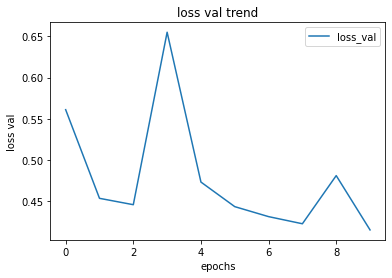

In [34]:
M1obj_1.loss_val_trend(epochs, loss_val_list)

In [35]:
print(index_label_prediction_list)

[[12, 1, 0], [22, 1, 0], [23, 1, 0], [33, 1, 0], [43, 0, 1], [47, 1, 0], [53, 1, 0], [56, 0, 1], [65, 0, 1], [66, 0, 1], [73, 1, 0], [83, 1, 0], [86, 1, 0], [89, 1, 0], [90, 1, 0], [97, 1, 0], [98, 1, 0], [101, 1, 0], [106, 1, 0], [114, 1, 0], [115, 0, 1], [121, 1, 0], [126, 0, 1], [131, 1, 0], [135, 1, 0], [141, 0, 1], [145, 1, 0], [171, 1, 0], [174, 1, 0], [184, 0, 1], [186, 1, 0], [195, 0, 1], [201, 1, 0], [203, 1, 0], [204, 1, 0], [205, 0, 1], [207, 1, 0], [210, 1, 0], [218, 0, 1], [221, 1, 0], [229, 1, 0], [242, 1, 0], [247, 1, 0], [248, 1, 0], [253, 1, 0], [259, 0, 1], [264, 0, 1], [266, 1, 0], [269, 1, 0], [290, 1, 0], [294, 1, 0], [306, 1, 0], [307, 1, 0], [308, 1, 0], [309, 1, 0], [311, 1, 0], [314, 1, 0], [325, 1, 0], [326, 1, 0], [335, 1, 0], [340, 1, 0], [352, 0, 1], [353, 1, 0], [363, 0, 1], [366, 0, 1], [371, 1, 0], [376, 1, 0], [390, 0, 1], [394, 0, 1], [400, 0, 1], [406, 1, 0], [410, 1, 0], [418, 1, 0], [419, 0, 1], [427, 1, 0], [436, 1, 0], [446, 1, 0], [449, 0, 1], [4

In [36]:
M1obj_1_submission = get_dataframe(result)

M1obj_1_submission.to_csv('M1obj_1_submission.csv(non-val)', index=False)

## M1obj_2 (DNN Model 1, GPU=True)

- input nodes = 6
> [ [ 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' ] ]
- hidden nodes = 20
- output nodes = 1 (0 or 1)
---
- learning rate = 0.1
- epochs = 15


In [37]:
input_nodes = training_data.shape[1] - 1
hidden_nodes = 20
output_nodes = 1

learning_rate = 1e-1
epochs = 15

In [38]:
M1obj_2 = Model1(learning_rate, input_nodes, hidden_nodes, output_nodes)

X = M1obj_2.X
T = M1obj_2.T

loss = M1obj_2.loss_val()

train = M1obj_2.train()

In [39]:
predicted = M1obj_2.predict()

accuracy = M1obj_2.accuracy()

In [40]:
result, loss_val_list, index_label_prediction_list = train_session(X, T, loss, train, predicted, accuracy)

epochs =  0 , step =  0 , loss_val =  0.9935141
epochs =  0 , step =  62 , loss_val =  0.5947146
epochs =  0 , step =  124 , loss_val =  0.57515806
epochs =  0 , step =  186 , loss_val =  0.55893266
epochs =  0 , step =  248 , loss_val =  0.56161666
epochs =  0 , step =  310 , loss_val =  0.5654958
epochs =  0 , step =  372 , loss_val =  0.54227406
epochs =  0 , step =  434 , loss_val =  0.53349954
epochs =  0 , step =  496 , loss_val =  0.53972876
epochs =  0 , step =  558 , loss_val =  0.601418
epochs =  0 , step =  620 , loss_val =  0.52631664
epochs =  1 , step =  0 , loss_val =  0.51510876
epochs =  1 , step =  62 , loss_val =  0.5391899
epochs =  1 , step =  124 , loss_val =  0.5355947
epochs =  1 , step =  186 , loss_val =  0.5340382
epochs =  1 , step =  248 , loss_val =  0.52902293
epochs =  1 , step =  310 , loss_val =  0.5238538
epochs =  1 , step =  372 , loss_val =  0.5218153
epochs =  1 , step =  434 , loss_val =  0.5193579
epochs =  1 , step =  496 , loss_val =  0.516674

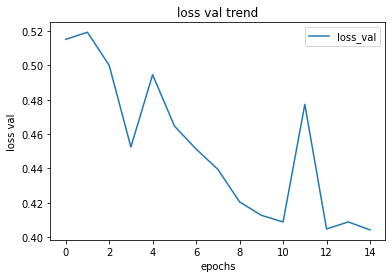

In [41]:
M1obj_2.loss_val_trend(epochs, loss_val_list) 

In [42]:
print(index_label_prediction_list)

[[12, 1, 0], [15, 0, 1], [23, 1, 0], [33, 1, 0], [43, 0, 1], [47, 1, 0], [53, 1, 0], [56, 0, 1], [65, 0, 1], [66, 0, 1], [73, 1, 0], [83, 1, 0], [86, 1, 0], [89, 1, 0], [90, 1, 0], [98, 1, 0], [101, 1, 0], [106, 1, 0], [114, 1, 0], [115, 0, 1], [121, 1, 0], [122, 0, 1], [126, 0, 1], [130, 0, 1], [132, 0, 1], [135, 1, 0], [137, 0, 1], [141, 0, 1], [145, 1, 0], [157, 0, 1], [162, 0, 1], [171, 1, 0], [174, 1, 0], [175, 0, 1], [176, 0, 1], [184, 0, 1], [196, 0, 1], [198, 0, 1], [201, 1, 0], [203, 1, 0], [204, 1, 0], [205, 0, 1], [207, 1, 0], [208, 0, 1], [210, 1, 0], [214, 0, 1], [218, 0, 1], [221, 1, 0], [229, 1, 0], [247, 1, 0], [250, 0, 1], [253, 1, 0], [259, 0, 1], [260, 0, 1], [264, 0, 1], [266, 1, 0], [269, 1, 0], [290, 1, 0], [293, 1, 0], [306, 1, 0], [308, 1, 0], [309, 1, 0], [311, 1, 0], [314, 1, 0], [318, 0, 1], [322, 0, 1], [325, 1, 0], [326, 1, 0], [335, 1, 0], [353, 1, 0], [357, 0, 1], [363, 0, 1], [366, 0, 1], [371, 1, 0], [383, 0, 1], [393, 0, 1], [394, 0, 1], [400, 0, 1], [

In [43]:
M1obj_2_submission = get_dataframe(result)

M1obj_2_submission.to_csv('M1obj_2_submission(non-val).csv', index=False)

## M1obj_3 (DNN Model 1, GPU=True)

- input nodes = 6
> [ [ 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' ] ]
- hidden nodes = 20
- output nodes = 1 (0 or 1)
---
- learning rate = 0.1
- epochs = 20

In [44]:
input_nodes = training_data.shape[1] - 1
hidden_nodes = 20
output_nodes = 1

learning_rate = 1e-1
epochs = 20

In [45]:
M1obj_3 = Model1(learning_rate, input_nodes, hidden_nodes, output_nodes)

X = M1obj_3.X
T = M1obj_3.T

loss = M1obj_3.loss_val()

train = M1obj_3.train()

In [46]:
predicted = M1obj_3.predict()

accuracy = M1obj_3.accuracy()

In [47]:
result, loss_val_list, index_label_prediction_list = train_session(X, T, loss, train, predicted, accuracy)

epochs =  0 , step =  0 , loss_val =  1.2965637
epochs =  0 , step =  62 , loss_val =  0.58445865
epochs =  0 , step =  124 , loss_val =  0.57283455
epochs =  0 , step =  186 , loss_val =  0.569698
epochs =  0 , step =  248 , loss_val =  0.56689364
epochs =  0 , step =  310 , loss_val =  0.56367344
epochs =  0 , step =  372 , loss_val =  0.5586593
epochs =  0 , step =  434 , loss_val =  0.55574596
epochs =  0 , step =  496 , loss_val =  0.5528043
epochs =  0 , step =  558 , loss_val =  0.5508398
epochs =  0 , step =  620 , loss_val =  0.54899234
epochs =  1 , step =  0 , loss_val =  0.54887694
epochs =  1 , step =  62 , loss_val =  0.5471459
epochs =  1 , step =  124 , loss_val =  0.5453809
epochs =  1 , step =  186 , loss_val =  0.54238653
epochs =  1 , step =  248 , loss_val =  0.5644019
epochs =  1 , step =  310 , loss_val =  0.5251152
epochs =  1 , step =  372 , loss_val =  0.5298167
epochs =  1 , step =  434 , loss_val =  0.51812196
epochs =  1 , step =  496 , loss_val =  0.511171

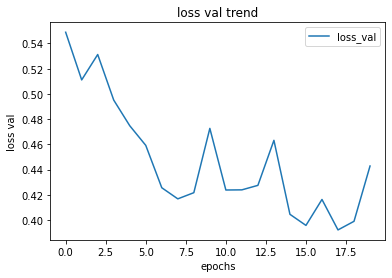

In [48]:
M1obj_3.loss_val_trend(epochs, loss_val_list)

In [49]:
print(index_label_prediction_list)

[[1, 1, 0], [4, 1, 0], [12, 1, 0], [13, 1, 0], [16, 1, 0], [22, 1, 0], [23, 1, 0], [27, 1, 0], [29, 1, 0], [32, 1, 0], [33, 1, 0], [35, 1, 0], [44, 1, 0], [47, 1, 0], [48, 1, 0], [53, 1, 0], [54, 1, 0], [55, 1, 0], [61, 1, 0], [62, 1, 0], [67, 1, 0], [73, 1, 0], [83, 1, 0], [85, 1, 0], [86, 1, 0], [89, 1, 0], [90, 1, 0], [95, 1, 0], [97, 1, 0], [98, 1, 0], [99, 1, 0], [101, 1, 0], [106, 1, 0], [108, 1, 0], [110, 1, 0], [114, 1, 0], [118, 1, 0], [121, 1, 0], [128, 1, 0], [131, 1, 0], [134, 1, 0], [135, 1, 0], [145, 1, 0], [152, 1, 0], [159, 1, 0], [166, 1, 0], [171, 1, 0], [172, 1, 0], [174, 1, 0], [181, 1, 0], [185, 1, 0], [186, 1, 0], [189, 1, 0], [192, 1, 0], [199, 1, 0], [201, 1, 0], [203, 1, 0], [204, 1, 0], [207, 1, 0], [210, 1, 0], [221, 1, 0], [229, 1, 0], [237, 1, 0], [240, 1, 0], [242, 1, 0], [247, 1, 0], [248, 1, 0], [253, 1, 0], [254, 1, 0], [258, 1, 0], [263, 1, 0], [266, 1, 0], [269, 1, 0], [275, 1, 0], [276, 1, 0], [277, 1, 0], [280, 1, 0], [281, 1, 0], [282, 1, 0], [284,

In [50]:
M1obj_3_submission = get_dataframe(result)

M1obj_3_submission.to_csv('M1obj_3_submission(non-val).csv', index=False)

## M1obj_4 (DNN Model 1, GPU=True)

- input nodes = 6
> [ [ 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' ] ]
- hidden nodes = 10
- output nodes = 1 (0 or 1)
---
- learning rate = 0.1
- epochs = 30

In [ ]:
input_nodes = training_data.shape[1] - 1
hidden_nodes = 10
output_nodes = 1

learning_rate = 1e-1
epochs = 30

In [ ]:
M1obj_4 = Model1(learning_rate, input_nodes, hidden_nodes, output_nodes)

X = M1obj_4.X
T = M1obj_4.T

loss = M1obj_4.loss_val()

train = M1obj_4.train()

In [ ]:
predicted = M1obj_4.predict()

accuracy = M1obj_4.accuracy()

In [ ]:
result, loss_val_list, index_label_prediction_list = train_session(X, T, loss, train, predicted, accuracy)

epochs =  0 , step =  0 , loss_val =  0.7240623
epochs =  0 , step =  56 , loss_val =  0.5696633
epochs =  0 , step =  112 , loss_val =  0.55728304
epochs =  0 , step =  168 , loss_val =  0.5443803
epochs =  0 , step =  224 , loss_val =  0.5594625
epochs =  0 , step =  280 , loss_val =  0.5494912
epochs =  0 , step =  336 , loss_val =  0.54814917
epochs =  0 , step =  392 , loss_val =  0.5832138
epochs =  0 , step =  448 , loss_val =  0.7103919
epochs =  0 , step =  504 , loss_val =  0.5232277
epochs =  0 , step =  560 , loss_val =  0.55876017
epochs =  1 , step =  0 , loss_val =  0.5590002
epochs =  1 , step =  56 , loss_val =  0.5410392
epochs =  1 , step =  112 , loss_val =  0.6071916
epochs =  1 , step =  168 , loss_val =  0.55980664
epochs =  1 , step =  224 , loss_val =  0.5428575
epochs =  1 , step =  280 , loss_val =  0.49999788
epochs =  1 , step =  336 , loss_val =  0.50094813
epochs =  1 , step =  392 , loss_val =  0.5206825
epochs =  1 , step =  448 , loss_val =  0.5128779


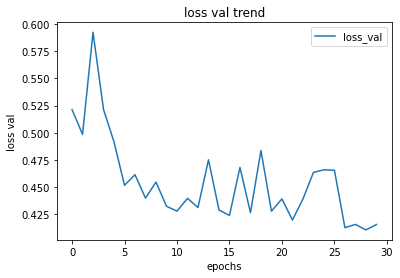

In [ ]:
M1obj_4.loss_val_trend(epochs, loss_val_list)

In [ ]:
print(index_label_prediction_list)

In [ ]:
M1obj_4_submission = get_dataframe(result)

M1obj_4_submission.to_csv('M1obj_4_submission(non-val).csv', index=False)

## M1obj_5 (DNN Model 1, GPU=True)

- input nodes = 6
> [ [ 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' ] ]
- hidden nodes = 10
- output nodes = 1 (0 or 1)
---
- learning rate = 0.01
- epochs = 30

In [ ]:
input_nodes = training_data.shape[1] - 1
hidden_nodes = 10
output_nodes = 1

learning_rate = 1e-2
epochs = 30

In [ ]:
M1obj_5 = Model1(learning_rate, input_nodes, hidden_nodes, output_nodes)

X = M1obj_5.X
T = M1obj_5.T

loss = M1obj_5.loss_val()

train = M1obj_5.train()

In [ ]:
predicted = M1obj_5.predict()

accuracy = M1obj_5.accuracy()

In [ ]:
result, loss_val_list, index_label_prediction_list = train_session(X, T, loss, train, predicted, accuracy)

epochs =  0 , step =  0 , loss_val =  2.2926185
epochs =  0 , step =  56 , loss_val =  1.1335791
epochs =  0 , step =  112 , loss_val =  0.7423874
epochs =  0 , step =  168 , loss_val =  0.6426517
epochs =  0 , step =  224 , loss_val =  0.6181552
epochs =  0 , step =  280 , loss_val =  0.61134917
epochs =  0 , step =  336 , loss_val =  0.6089889
epochs =  0 , step =  392 , loss_val =  0.60804665
epochs =  0 , step =  448 , loss_val =  0.60757965
epochs =  0 , step =  504 , loss_val =  0.6072705
epochs =  0 , step =  560 , loss_val =  0.6070217
epochs =  1 , step =  0 , loss_val =  0.6070134
epochs =  1 , step =  56 , loss_val =  0.6067925
epochs =  1 , step =  112 , loss_val =  0.60658085
epochs =  1 , step =  168 , loss_val =  0.6063562
epochs =  1 , step =  224 , loss_val =  0.6060454
epochs =  1 , step =  280 , loss_val =  0.60530514
epochs =  1 , step =  336 , loss_val =  0.6039344
epochs =  1 , step =  392 , loss_val =  0.60269904
epochs =  1 , step =  448 , loss_val =  0.6021081


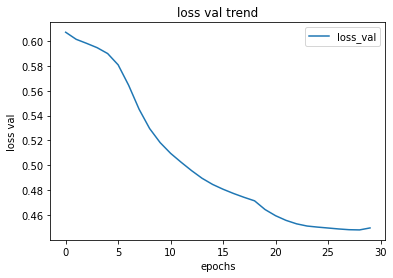

In [ ]:
M1obj_5.loss_val_trend(epochs, loss_val_list)

In [ ]:
print(index_label_prediction_list)

In [ ]:
M1obj_5_submission = get_dataframe(result)

M1obj_5_submission.to_csv('M1obj_5_submission(non-val).csv', index=False)

## M1obj_6 (DNN Model 1, GPU=True)

- input nodes = 6
> [ [ 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' ] ]
- hidden nodes = 10
- output nodes = 1 (0 or 1)
---
- learning rate = 0.01
- epochs = 50

In [ ]:
input_nodes = training_data.shape[1] - 1
hidden_nodes = 10
output_nodes = 1

learning_rate = 1e-2
epochs = 50

In [ ]:
M1obj_6 = Model1(learning_rate, input_nodes, hidden_nodes, output_nodes)

X = M1obj_6.X
T = M1obj_6.T

loss = M1obj_6.loss_val()

train = M1obj_6.train()

In [ ]:
predicted = M1obj_6.predict()

accuracy = M1obj_6.accuracy()

In [ ]:
result, loss_val_list, index_label_prediction_list = train_session(X, T, loss, train, predicted, accuracy)

epochs =  0 , step =  0 , loss_val =  1.3632358
epochs =  0 , step =  56 , loss_val =  0.9563424
epochs =  0 , step =  112 , loss_val =  0.8125879
epochs =  0 , step =  168 , loss_val =  0.75754696
epochs =  0 , step =  224 , loss_val =  0.72902226
epochs =  0 , step =  280 , loss_val =  0.70981365
epochs =  0 , step =  336 , loss_val =  0.6928834
epochs =  0 , step =  392 , loss_val =  0.68003476
epochs =  0 , step =  448 , loss_val =  0.66331375
epochs =  0 , step =  504 , loss_val =  0.64526
epochs =  0 , step =  560 , loss_val =  0.6366422
epochs =  1 , step =  0 , loss_val =  0.63642156
epochs =  1 , step =  56 , loss_val =  0.6316448
epochs =  1 , step =  112 , loss_val =  0.6281953
epochs =  1 , step =  168 , loss_val =  0.6253275
epochs =  1 , step =  224 , loss_val =  0.62301123
epochs =  1 , step =  280 , loss_val =  0.6211257
epochs =  1 , step =  336 , loss_val =  0.6195207
epochs =  1 , step =  392 , loss_val =  0.61816055
epochs =  1 , step =  448 , loss_val =  0.61699575

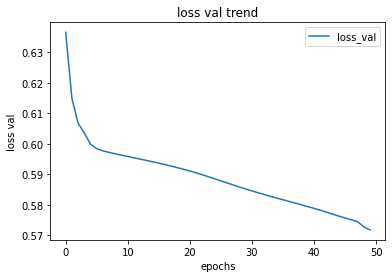

In [ ]:
M1obj_6.loss_val_trend(epochs, loss_val_list)

In [ ]:
print(index_label_prediction_list)

In [ ]:
M1obj_6_submission = get_dataframe(result)

M1obj_6_submission.to_csv('M1obj_6_submission(non-val).csv', index=False)

## M1obj_7 (DNN Model 1, GPU=True)

- input nodes = 6
> [ [ 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' ] ]
- hidden nodes = 20
- output nodes = 1 (0 or 1)
---
- learning rate = 0.1
- epochs = 35

In [ ]:
input_nodes = training_data.shape[1] - 1
hidden_nodes = 20
output_nodes = 1

learning_rate = 1e-1
epochs = 35

In [ ]:
M1obj_7 = Model1(learning_rate, input_nodes, hidden_nodes, output_nodes)

X = M1obj_7.X
T = M1obj_7.T

loss = M1obj_7.loss_val()

train = M1obj_7.train()

In [ ]:
predicted = M1obj_7.predict()

accuracy = M1obj_7.accuracy()

In [ ]:
result, loss_val_list, index_label_prediction_list = train_session(X, T, loss, train, predicted, accuracy)

epochs =  0 , step =  0 , loss_val =  2.7854528
epochs =  0 , step =  56 , loss_val =  0.5864839
epochs =  0 , step =  112 , loss_val =  0.5778058
epochs =  0 , step =  168 , loss_val =  0.5744521
epochs =  0 , step =  224 , loss_val =  0.57215905
epochs =  0 , step =  280 , loss_val =  0.5703718
epochs =  0 , step =  336 , loss_val =  0.5692826
epochs =  0 , step =  392 , loss_val =  0.56804734
epochs =  0 , step =  448 , loss_val =  0.5667554
epochs =  0 , step =  504 , loss_val =  0.5652487
epochs =  0 , step =  560 , loss_val =  0.55794334
epochs =  1 , step =  0 , loss_val =  0.5572602
epochs =  1 , step =  56 , loss_val =  0.5501443
epochs =  1 , step =  112 , loss_val =  0.5463223
epochs =  1 , step =  168 , loss_val =  0.5401777
epochs =  1 , step =  224 , loss_val =  0.5331521
epochs =  1 , step =  280 , loss_val =  0.52835435
epochs =  1 , step =  336 , loss_val =  0.5267041
epochs =  1 , step =  392 , loss_val =  0.52506495
epochs =  1 , step =  448 , loss_val =  0.52315754


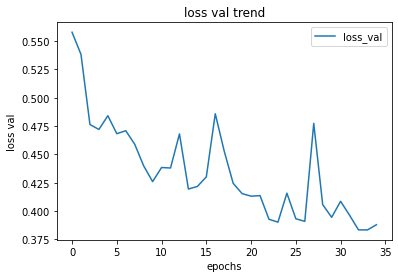

In [ ]:
M1obj_7.loss_val_trend(epochs, loss_val_list)

In [ ]:
print(index_label_prediction_list)

In [ ]:
M1obj_7_submission = get_dataframe(result)

M1obj_7_submission.to_csv('M1obj_7_submission(non-val).csv', index=False)

## M1obj_8 (DNN Model 1, GPU=True)

- input nodes = 6
> [ [ 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' ] ]
- hidden nodes = 20
- output nodes = 1 (0 or 1)
---
- learning rate = 0.01
- epochs = 70

In [ ]:
input_nodes = training_data.shape[1] - 1
hidden_nodes = 20
output_nodes = 1

learning_rate = 1e-2
epochs = 70

In [ ]:
M1obj_8 = Model1(learning_rate, input_nodes, hidden_nodes, output_nodes)

X = M1obj_8.X
T = M1obj_8.T

loss = M1obj_8.loss_val()

train = M1obj_8.train()

In [ ]:
predicted = M1obj_8.predict()

accuracy = M1obj_8.accuracy()

In [ ]:
result, loss_val_list, index_label_prediction_list = train_session(X, T, loss, train, predicted, accuracy)

epochs =  0 , step =  0 , loss_val =  1.9606892
epochs =  0 , step =  56 , loss_val =  0.8512502
epochs =  0 , step =  112 , loss_val =  0.7449695
epochs =  0 , step =  168 , loss_val =  0.6998605
epochs =  0 , step =  224 , loss_val =  0.6748288
epochs =  0 , step =  280 , loss_val =  0.6514078
epochs =  0 , step =  336 , loss_val =  0.64161086
epochs =  0 , step =  392 , loss_val =  0.63428926
epochs =  0 , step =  448 , loss_val =  0.62877554
epochs =  0 , step =  504 , loss_val =  0.6245801
epochs =  0 , step =  560 , loss_val =  0.6213504
epochs =  1 , step =  0 , loss_val =  0.6212493
epochs =  1 , step =  56 , loss_val =  0.61874217
epochs =  1 , step =  112 , loss_val =  0.61673474
epochs =  1 , step =  168 , loss_val =  0.61512804
epochs =  1 , step =  224 , loss_val =  0.61381704
epochs =  1 , step =  280 , loss_val =  0.61271113
epochs =  1 , step =  336 , loss_val =  0.61174345
epochs =  1 , step =  392 , loss_val =  0.61087316
epochs =  1 , step =  448 , loss_val =  0.6100

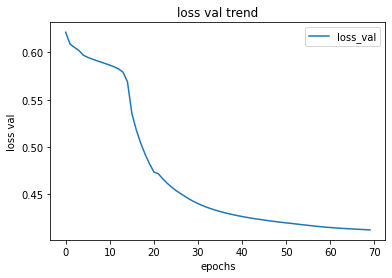

In [ ]:
M1obj_8.loss_val_trend(epochs, loss_val_list)

In [ ]:
print(index_label_prediction_list)

In [ ]:
M1obj_8_submission = get_dataframe(result)

M1obj_8_submission.to_csv('M1obj_8_submission(non-val).csv', index=False)

## M1obj_9 (DNN Model 1, GPU=True)

- input nodes = 6
> [ [ 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' ] ]
- hidden nodes = 20
- output nodes = 1 (0 or 1)
---
- learning rate = 0.01
- epochs = 100

In [ ]:
input_nodes = training_data.shape[1] - 1
hidden_nodes = 20
output_nodes = 1

learning_rate = 1e-2
epochs = 100

In [ ]:
M1obj_9 = Model1(learning_rate, input_nodes, hidden_nodes, output_nodes)

X = M1obj_9.X
T = M1obj_9.T

loss = M1obj_9.loss_val()

train = M1obj_9.train()

In [ ]:
predicted = M1obj_9.predict()

accuracy = M1obj_9.accuracy()

In [ ]:
result, loss_val_list, index_label_prediction_list = train_session(X, T, loss, train, predicted, accuracy)

epochs =  0 , step =  0 , loss_val =  1.793307
epochs =  0 , step =  56 , loss_val =  0.6451096
epochs =  0 , step =  112 , loss_val =  0.623048
epochs =  0 , step =  168 , loss_val =  0.61925393
epochs =  0 , step =  224 , loss_val =  0.61694485
epochs =  0 , step =  280 , loss_val =  0.6151083
epochs =  0 , step =  336 , loss_val =  0.6136084
epochs =  0 , step =  392 , loss_val =  0.61239755
epochs =  0 , step =  448 , loss_val =  0.6114049
epochs =  0 , step =  504 , loss_val =  0.61054593
epochs =  0 , step =  560 , loss_val =  0.6097575
epochs =  1 , step =  0 , loss_val =  0.60973066
epochs =  1 , step =  56 , loss_val =  0.6090391
epochs =  1 , step =  112 , loss_val =  0.60847235
epochs =  1 , step =  168 , loss_val =  0.60799474
epochs =  1 , step =  224 , loss_val =  0.60757613
epochs =  1 , step =  280 , loss_val =  0.6072012
epochs =  1 , step =  336 , loss_val =  0.6068612
epochs =  1 , step =  392 , loss_val =  0.60654986
epochs =  1 , step =  448 , loss_val =  0.6062618

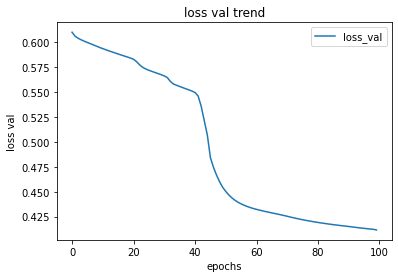

In [ ]:
M1obj_9.loss_val_trend(epochs, loss_val_list)

In [ ]:
print(index_label_prediction_list)

In [ ]:
M1obj_9_submission = get_dataframe(result)

M1obj_9_submission.to_csv('M1obj_9_submission(non-val).csv', index=False)

## M1obj_10 (DNN Model 1, GPU=True)

- input nodes = 6
> [ [ 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' ] ]
- hidden nodes = 30
- output nodes = 1 (0 or 1)
---
- learning rate = 0.1
- epochs = 10

In [ ]:
input_nodes = training_data.shape[1] - 1
hidden_nodes = 30
output_nodes = 1

learning_rate = 1e-1
epochs = 10

In [ ]:
M1obj_10 = Model1(learning_rate, input_nodes, hidden_nodes, output_nodes)

X = M1obj_10.X
T = M1obj_10.T

loss = M1obj_10.loss_val()

train = M1obj_10.train()

In [ ]:
predicted = M1obj_10.predict()

accuracy = M1obj_10.accuracy()

In [ ]:
result, loss_val_list, index_label_prediction_list = train_session(X, T, loss, train, predicted, accuracy)

epochs =  0 , step =  0 , loss_val =  0.79603267
epochs =  0 , step =  56 , loss_val =  0.57896024
epochs =  0 , step =  112 , loss_val =  0.57447183
epochs =  0 , step =  168 , loss_val =  0.57148683
epochs =  0 , step =  224 , loss_val =  0.56886643
epochs =  0 , step =  280 , loss_val =  0.5662652
epochs =  0 , step =  336 , loss_val =  0.56365716
epochs =  0 , step =  392 , loss_val =  0.561225
epochs =  0 , step =  448 , loss_val =  0.55873746
epochs =  0 , step =  504 , loss_val =  0.55603117
epochs =  0 , step =  560 , loss_val =  0.55298406
epochs =  1 , step =  0 , loss_val =  0.55287117
epochs =  1 , step =  56 , loss_val =  0.54981744
epochs =  1 , step =  112 , loss_val =  0.54670024
epochs =  1 , step =  168 , loss_val =  0.54186016
epochs =  1 , step =  224 , loss_val =  0.53489244
epochs =  1 , step =  280 , loss_val =  0.5306652
epochs =  1 , step =  336 , loss_val =  0.525454
epochs =  1 , step =  392 , loss_val =  0.5203071
epochs =  1 , step =  448 , loss_val =  0.53

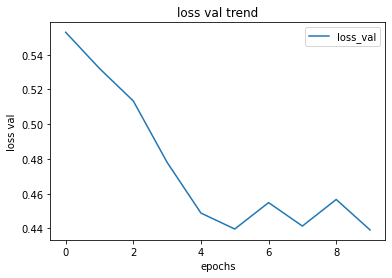

In [ ]:
M1obj_10.loss_val_trend(epochs, loss_val_list)

In [ ]:
print(index_label_prediction_list)

In [ ]:
M1obj_10_submission = get_dataframe(result)

M1obj_10_submission.to_csv('M1obj_10_submission(non-val).csv', index=False)

## M1obj_11 (DNN Model 1, GPU=True)

- input nodes = 6
> [ [ 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' ] ]
- hidden nodes = 30
- output nodes = 1 (0 or 1)
---
- learning rate = 0.01
- epochs = 50

In [ ]:
input_nodes = training_data.shape[1] - 1
hidden_nodes = 30
output_nodes = 1

learning_rate = 1e-2
epochs = 50

In [ ]:
M1obj_11 = Model1(learning_rate, input_nodes, hidden_nodes, output_nodes)

X = M1obj_11.X
T = M1obj_11.T

loss = M1obj_11.loss_val()

train = M1obj_11.train()

In [ ]:
predicted = M1obj_11.predict()

accuracy = M1obj_11.accuracy()

In [ ]:
result, loss_val_list, index_label_prediction_list = train_session(X, T, loss, train, predicted, accuracy)

epochs =  0 , step =  0 , loss_val =  3.2291508
epochs =  0 , step =  56 , loss_val =  1.3358454
epochs =  0 , step =  112 , loss_val =  0.9340991
epochs =  0 , step =  168 , loss_val =  0.735896
epochs =  0 , step =  224 , loss_val =  0.6693177
epochs =  0 , step =  280 , loss_val =  0.6373388
epochs =  0 , step =  336 , loss_val =  0.6195712
epochs =  0 , step =  392 , loss_val =  0.60961264
epochs =  0 , step =  448 , loss_val =  0.60333985
epochs =  0 , step =  504 , loss_val =  0.598856
epochs =  0 , step =  560 , loss_val =  0.59467643
epochs =  1 , step =  0 , loss_val =  0.59452236
epochs =  1 , step =  56 , loss_val =  0.5906883
epochs =  1 , step =  112 , loss_val =  0.58816373
epochs =  1 , step =  168 , loss_val =  0.5863644
epochs =  1 , step =  224 , loss_val =  0.5849352
epochs =  1 , step =  280 , loss_val =  0.5837783
epochs =  1 , step =  336 , loss_val =  0.58284587
epochs =  1 , step =  392 , loss_val =  0.58207357
epochs =  1 , step =  448 , loss_val =  0.5814123
e

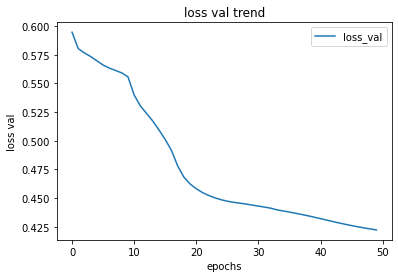

In [ ]:
M1obj_11.loss_val_trend(epochs, loss_val_list)

In [ ]:
print(index_label_prediction_list)

In [ ]:
M1obj_11_submission = get_dataframe(result)

M1obj_11_submission.to_csv('M1obj_11_submission(non-val).csv', index=False)

## M1obj_12 (DNN Model 1, GPU=True)

- input nodes = 6
> [ [ 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' ] ]
- hidden nodes = 30
- output nodes = 1 (0 or 1)
---
- learning rate = 0.01
- epochs = 100

In [ ]:
input_nodes = training_data.shape[1] - 1
hidden_nodes = 30
output_nodes = 1

learning_rate = 1e-2
epochs = 50

In [ ]:
M1obj_12 = Model1(learning_rate, input_nodes, hidden_nodes, output_nodes)

X = M1obj_12.X
T = M1obj_12.T

loss = M1obj_12.loss_val()

train = M1obj_12.train()

In [ ]:
predicted = M1obj_12.predict()

accuracy = M1obj_12.accuracy()

In [ ]:
result, loss_val_list, index_label_prediction_list = train_session(X, T, loss, train, predicted, accuracy)

epochs =  0 , step =  0 , loss_val =  1.4537687
epochs =  0 , step =  62 , loss_val =  0.7237003
epochs =  0 , step =  124 , loss_val =  0.63388115
epochs =  0 , step =  186 , loss_val =  0.6096913
epochs =  0 , step =  248 , loss_val =  0.5996543
epochs =  0 , step =  310 , loss_val =  0.5917864
epochs =  0 , step =  372 , loss_val =  0.5872328
epochs =  0 , step =  434 , loss_val =  0.5838087
epochs =  0 , step =  496 , loss_val =  0.5803445
epochs =  0 , step =  558 , loss_val =  0.5761281
epochs =  0 , step =  620 , loss_val =  0.5742889
epochs =  1 , step =  0 , loss_val =  0.57418096
epochs =  1 , step =  62 , loss_val =  0.5725362
epochs =  1 , step =  124 , loss_val =  0.57089037
epochs =  1 , step =  186 , loss_val =  0.5694374
epochs =  1 , step =  248 , loss_val =  0.5681294
epochs =  1 , step =  310 , loss_val =  0.56700355
epochs =  1 , step =  372 , loss_val =  0.5660426
epochs =  1 , step =  434 , loss_val =  0.56516653
epochs =  1 , step =  496 , loss_val =  0.56433934


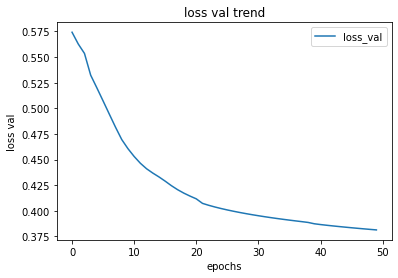

In [ ]:
M1obj_12.loss_val_trend(epochs, loss_val_list)

In [ ]:
print(index_label_prediction_list)

In [ ]:
M1obj_12_submission = get_dataframe(result)

M1obj_12_submission.to_csv('M1obj_12_submission(non-val).csv', index=False)

## DNN Model 2


- number of hidden node = 1
----
- error = Cross Entropy
- optimizer = Adam
----
- loss value trend method = True
- accuracy value trend method = True

In [ ]:
class Model2:

  def __init__(self, learning_rate, input_nodes, hidden_nodes, output_nodes):
    
    self.learning_rate = learning_rate

    self.input_nodes = input_nodes
    self.hidden_nodes = hidden_nodes
    self.output_nodes = output_nodes

    self.X = tf.placeholder(tf.float32, [None, self.input_nodes])  # 7개 입력노드
    self.T = tf.placeholder(tf.float32, [None, self.output_nodes])  # 1개 정답노드

    self.W2 = tf.Variable(tf.random_normal([self.input_nodes, self.hidden_nodes]))  # 가중치 노드
    self.b2 = tf.Variable(tf.random_normal([self.hidden_nodes]))     # 바이어스 노드

    self.W3 = tf.Variable(tf.random_normal([self.hidden_nodes, self.output_nodes]))  # 가중치 노드
    self.b3 = tf.Variable(tf.random_normal([self.output_nodes]))     # 바이어스 노드

    self.z2 = tf.matmul(self.X, self.W2) + self.b2
    self.a2 = tf.sigmoid(self.z2)

    self.z3 = tf.matmul(self.a2, self.W3) + self.b3
    self.a3 = self.y = tf.sigmoid(self.z3)

    self.optimizer = tf.train.AdamOptimizer(self.learning_rate)

  def __feed_forward(self):
    return -tf.reduce_mean( self.T*tf.log(self.y) + (1-self.T)*tf.log(1-self.y))

  def loss_val(self):
    return -tf.reduce_mean( self.T*tf.log(self.y) + (1-self.T)*tf.log(1-self.y))

  def train(self):
    return self.optimizer.minimize(self.loss_val())

  def loss_val_trend(self, epochs, loss_val_list):
    plt.plot(range(epochs), loss_val_list)
    plt.xlabel('epochs')
    plt.ylabel('loss val')
    plt.title('loss val trend')
    plt.legend(['loss_val'])
    plt.show()

  def accuracy_trend(self, epochs, training_accuracy_list, validation_accuracy_list):
    plt.plot(range(epochs), training_accuracy_list)
    plt.plot(range(epochs), validation_accuracy_list)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.title('overfitting trend')
    plt.legend(['training_accuracy_val', 'validation_accuracy_val'])
    plt.show()

  def predict(self):
    return tf.cast(self.y > 0.5, dtype=tf.float32)

  def accuracy(self):
    return tf.reduce_mean(tf.cast(tf.equal(self.predict(), self.T), dtype=tf.float32))

## M2obj_1 (DNN Model 2, GPU=True)

- input nodes = 6
> [ [ 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' ] ]
- hidden nodes = 10
- output nodes = 1 (0 or 1)
---
- learning rate = 0.1
- epochs = 20

In [ ]:
input_nodes = training_data.shape[1] - 1
hidden_nodes = 10
output_nodes = 1

learning_rate = 1e-1
epochs = 20

In [ ]:
M2obj_1 = Model2(learning_rate, input_nodes, hidden_nodes, output_nodes)

X = M2obj_1.X
T = M2obj_1.T

loss = M2obj_1.loss_val()

train = M2obj_1.train()

In [ ]:
predicted = M2obj_1.predict()

accuracy = M2obj_1.accuracy()

In [ ]:
result, loss_val_list, index_label_prediction_list = train_session(X, T, loss, train, predicted, accuracy)

epochs =  0 , step =  0 , loss_val =  1.4618576
epochs =  0 , step =  56 , loss_val =  0.5374901
epochs =  0 , step =  112 , loss_val =  0.42143646
epochs =  0 , step =  168 , loss_val =  0.41252425
epochs =  0 , step =  224 , loss_val =  0.4017942
epochs =  0 , step =  280 , loss_val =  0.40112355
epochs =  0 , step =  336 , loss_val =  0.40003636
epochs =  0 , step =  392 , loss_val =  0.39851862
epochs =  0 , step =  448 , loss_val =  0.397472
epochs =  0 , step =  504 , loss_val =  0.39696005
epochs =  0 , step =  560 , loss_val =  0.39733633
epochs =  1 , step =  0 , loss_val =  0.39699745
epochs =  1 , step =  56 , loss_val =  0.39700976
epochs =  1 , step =  112 , loss_val =  0.3955322
epochs =  1 , step =  168 , loss_val =  0.39623302
epochs =  1 , step =  224 , loss_val =  0.39504942
epochs =  1 , step =  280 , loss_val =  0.3952394
epochs =  1 , step =  336 , loss_val =  0.39451537
epochs =  1 , step =  392 , loss_val =  0.39284644
epochs =  1 , step =  448 , loss_val =  0.39

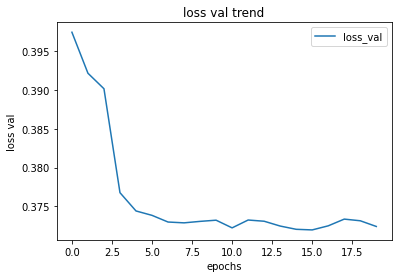

In [ ]:
M2obj_1.loss_val_trend(epochs, loss_val_list)

In [ ]:
print(index_label_prediction_list)

In [ ]:
M2obj_1_submission = get_dataframe(result)

M2obj_1_submission.to_csv('M2obj_1_submission(non-val).csv', index=False)

## M2obj_2 (DNN Model 2, GPU=True)

- input nodes = 6
> [ [ 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' ] ]
- hidden nodes = 3
- output nodes = 1 (0 or 1)
---
- learning rate = 0.01
- epochs = 50

In [ ]:
input_nodes = training_data.shape[1] - 1
hidden_nodes = 3
output_nodes = 1

learning_rate = 1e-2
epochs = 50

In [ ]:
M2obj_2 = Model2(learning_rate, input_nodes, hidden_nodes, output_nodes)

X = M2obj_2.X
T = M2obj_2.T

loss = M2obj_2.loss_val()

train = M2obj_2.train()

In [ ]:
predicted = M2obj_2.predict()

accuracy = M2obj_2.accuracy()

In [ ]:
result, loss_val_list, index_label_prediction_list = train_session(X, T, loss, train, predicted, accuracy)

epochs =  0 , step =  0 , loss_val =  1.3836007
epochs =  0 , step =  62 , loss_val =  0.6505444
epochs =  0 , step =  124 , loss_val =  0.62002605
epochs =  0 , step =  186 , loss_val =  0.6027105
epochs =  0 , step =  248 , loss_val =  0.5809673
epochs =  0 , step =  310 , loss_val =  0.52162164
epochs =  0 , step =  372 , loss_val =  0.4988534
epochs =  0 , step =  434 , loss_val =  0.48510185
epochs =  0 , step =  496 , loss_val =  0.47398078
epochs =  0 , step =  558 , loss_val =  0.464439
epochs =  0 , step =  620 , loss_val =  0.45945188
epochs =  1 , step =  0 , loss_val =  0.4591662
epochs =  1 , step =  62 , loss_val =  0.45252723
epochs =  1 , step =  124 , loss_val =  0.44275182
epochs =  1 , step =  186 , loss_val =  0.43820968
epochs =  1 , step =  248 , loss_val =  0.43494186
epochs =  1 , step =  310 , loss_val =  0.43203536
epochs =  1 , step =  372 , loss_val =  0.42959976
epochs =  1 , step =  434 , loss_val =  0.42743507
epochs =  1 , step =  496 , loss_val =  0.421

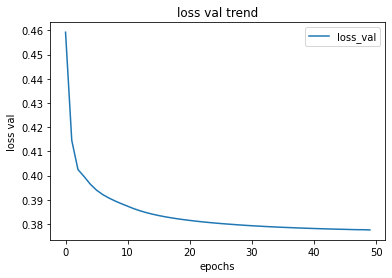

In [ ]:
M2obj_2.loss_val_trend(epochs, loss_val_list)

In [ ]:
print(index_label_prediction_list)

In [ ]:
M2obj_2_submission = get_dataframe(result)

M2obj_2_submission.to_csv('M2obj_2_submission(non-val).csv', index=False)

## M2obj_3 (DNN Model 2, GPU=True)

- input nodes = 6
> [ [ 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' ] ]
- hidden nodes = 5
- output nodes = 1 (0 or 1)
---
- learning rate = 0.1
- epochs = 10

In [ ]:
input_nodes = training_data.shape[1] - 1
hidden_nodes = 5
output_nodes = 1

learning_rate = 1e-1
epochs = 10

In [ ]:
M2obj_3 = Model2(learning_rate, input_nodes, hidden_nodes, output_nodes)

X = M2obj_3.X
T = M2obj_3.T

loss = M2obj_3.loss_val()

train = M2obj_3.train()

In [ ]:
predicted = M2obj_3.predict()

accuracy = M2obj_3.accuracy()

In [ ]:
result, loss_val_list, index_label_prediction_list = train_session(X, T, loss, train, predicted, accuracy)

epochs =  0 , step =  0 , loss_val =  1.2822617
epochs =  0 , step =  56 , loss_val =  0.5676662
epochs =  0 , step =  112 , loss_val =  0.4440129
epochs =  0 , step =  168 , loss_val =  0.44504756
epochs =  0 , step =  224 , loss_val =  0.43249217
epochs =  0 , step =  280 , loss_val =  0.477551
epochs =  0 , step =  336 , loss_val =  0.42751083
epochs =  0 , step =  392 , loss_val =  0.42707846
epochs =  0 , step =  448 , loss_val =  0.42704433
epochs =  0 , step =  504 , loss_val =  0.42703992
epochs =  0 , step =  560 , loss_val =  0.42703804
epochs =  1 , step =  0 , loss_val =  0.4270379
epochs =  1 , step =  56 , loss_val =  0.42853296
epochs =  1 , step =  112 , loss_val =  0.43021953
epochs =  1 , step =  168 , loss_val =  0.4536865
epochs =  1 , step =  224 , loss_val =  0.42918602
epochs =  1 , step =  280 , loss_val =  0.45417607
epochs =  1 , step =  336 , loss_val =  0.43036252
epochs =  1 , step =  392 , loss_val =  0.42743525
epochs =  1 , step =  448 , loss_val =  0.42

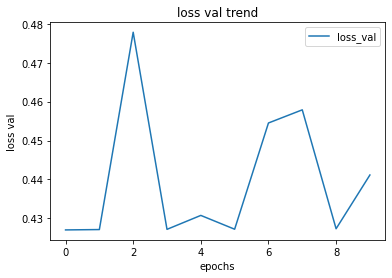

In [ ]:
M2obj_3.loss_val_trend(epochs, loss_val_list)

In [ ]:
print(index_label_prediction_list)

In [ ]:
M2obj_3_submission = get_dataframe(result)

M2obj_3_submission.to_csv('M2obj_3_submission(non-val).csv', index=False)

## M2obj_4 (DNN Model 2, GPU=True)

- input nodes = 6
> [ [ 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' ] ]
- hidden nodes = 10
- output nodes = 1 (0 or 1)
---
- learning rate = 0.001
- epochs = 60

In [ ]:
input_nodes = training_data.shape[1] - 1
hidden_nodes = 10
output_nodes = 1

learning_rate = 1e-3
epochs = 60

In [ ]:
M2obj_4 = Model2(learning_rate, input_nodes, hidden_nodes, output_nodes)

X = M2obj_4.X
T = M2obj_4.T

loss = M2obj_4.loss_val()

train = M2obj_4.train()

In [ ]:
predicted = M2obj_4.predict()

accuracy = M2obj_4.accuracy()

In [ ]:
result, loss_val_list, index_label_prediction_list = train_session(X, T, loss, train, predicted, accuracy)

epochs =  0 , step =  0 , loss_val =  1.4145784
epochs =  0 , step =  56 , loss_val =  1.2665462
epochs =  0 , step =  112 , loss_val =  1.1099656
epochs =  0 , step =  168 , loss_val =  0.8311256
epochs =  0 , step =  224 , loss_val =  0.701614
epochs =  0 , step =  280 , loss_val =  0.6603301
epochs =  0 , step =  336 , loss_val =  0.64124703
epochs =  0 , step =  392 , loss_val =  0.62956756
epochs =  0 , step =  448 , loss_val =  0.6196294
epochs =  0 , step =  504 , loss_val =  0.61338186
epochs =  0 , step =  560 , loss_val =  0.5856616
epochs =  1 , step =  0 , loss_val =  0.5849245
epochs =  1 , step =  56 , loss_val =  0.56755584
epochs =  1 , step =  112 , loss_val =  0.5540925
epochs =  1 , step =  168 , loss_val =  0.5419709
epochs =  1 , step =  224 , loss_val =  0.5321248
epochs =  1 , step =  280 , loss_val =  0.5239431
epochs =  1 , step =  336 , loss_val =  0.51693815
epochs =  1 , step =  392 , loss_val =  0.5106776
epochs =  1 , step =  448 , loss_val =  0.50495756
e

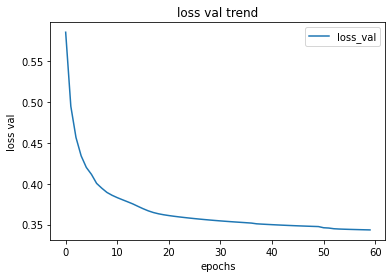

In [ ]:
M2obj_4.loss_val_trend(epochs, loss_val_list)

In [ ]:
print(index_label_prediction_list)

In [ ]:
M2obj_4_submission = get_dataframe(result)

M2obj_4_submission.to_csv('M2obj_4_submission.csv(non-val)', index=False)

## M2obj_5 (DNN Model 2, GPU=True)

- input nodes = 6
> [ [ 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' ] ]
- hidden nodes = 3
- output nodes = 1 (0 or 1)
---
- learning rate = 0.1
- epochs = 20

In [ ]:
input_nodes = training_data.shape[1] - 1
hidden_nodes = 3
output_nodes = 1

learning_rate = 1e-1
epochs = 20

In [ ]:
M2obj_5 = Model2(learning_rate, input_nodes, hidden_nodes, output_nodes)

X = M2obj_5.X
T = M2obj_5.T

loss = M2obj_5.loss_val()

train = M2obj_5.train()

In [ ]:
predicted = M2obj_5.predict()

accuracy = M2obj_5.accuracy()

In [ ]:
result, loss_val_list, index_label_prediction_list = train_session(X, T, loss, train, predicted, accuracy)

epochs =  0 , step =  0 , loss_val =  0.67679244
epochs =  0 , step =  56 , loss_val =  0.6669888
epochs =  0 , step =  112 , loss_val =  0.66698134
epochs =  0 , step =  168 , loss_val =  0.66698134
epochs =  0 , step =  224 , loss_val =  0.6669813
epochs =  0 , step =  280 , loss_val =  0.6669814
epochs =  0 , step =  336 , loss_val =  0.66698134
epochs =  0 , step =  392 , loss_val =  0.6669813
epochs =  0 , step =  448 , loss_val =  0.6669814
epochs =  0 , step =  504 , loss_val =  0.6669814
epochs =  0 , step =  560 , loss_val =  0.66698134
epochs =  1 , step =  0 , loss_val =  0.6669813
epochs =  1 , step =  56 , loss_val =  0.6669812
epochs =  1 , step =  112 , loss_val =  0.66698134
epochs =  1 , step =  168 , loss_val =  0.6669813
epochs =  1 , step =  224 , loss_val =  0.6669813
epochs =  1 , step =  280 , loss_val =  0.66698134
epochs =  1 , step =  336 , loss_val =  0.6669814
epochs =  1 , step =  392 , loss_val =  0.6669814
epochs =  1 , step =  448 , loss_val =  0.6669813

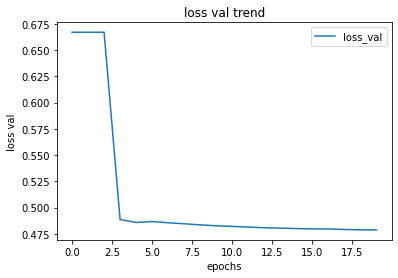

In [ ]:
M2obj_5.loss_val_trend(epochs, loss_val_list)

In [ ]:
print(index_label_prediction_list)

In [ ]:
M2obj_5_submission = get_dataframe(result)

M2obj_5_submission.to_csv('M2obj_5_submission(non-val).csv', index=False)

## M2obj_6 (DNN Model 2, GPU=True)

- input nodes = 6
> [ [ 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' ] ]
- hidden nodes = 1
- output nodes = 1 (0 or 1)
---
- learning rate = 0.1
- epochs = 20

In [ ]:
input_nodes = training_data.shape[1] - 1
hidden_nodes = 1
output_nodes = 1

learning_rate = 1e-1
epochs = 20

In [ ]:
M2obj_6 = Model2(learning_rate, input_nodes, hidden_nodes, output_nodes)

X = M2obj_6.X
T = M2obj_6.T

loss = M2obj_6.loss_val()

train = M2obj_6.train()

In [ ]:
predicted = M2obj_6.predict()

accuracy = M2obj_6.accuracy()

In [ ]:
result, loss_val_list, index_label_prediction_list = train_session(X, T, loss, train, predicted, accuracy)

epochs =  0 , step =  0 , loss_val =  0.7044198
epochs =  0 , step =  56 , loss_val =  0.59447885
epochs =  0 , step =  112 , loss_val =  0.478582
epochs =  0 , step =  168 , loss_val =  0.4586438
epochs =  0 , step =  224 , loss_val =  0.43119586
epochs =  0 , step =  280 , loss_val =  0.4476094
epochs =  0 , step =  336 , loss_val =  0.42897254
epochs =  0 , step =  392 , loss_val =  0.43124634
epochs =  0 , step =  448 , loss_val =  0.43121502
epochs =  0 , step =  504 , loss_val =  0.42919868
epochs =  0 , step =  560 , loss_val =  0.49558723
epochs =  1 , step =  0 , loss_val =  0.43488827
epochs =  1 , step =  56 , loss_val =  0.45153585
epochs =  1 , step =  112 , loss_val =  0.43011397
epochs =  1 , step =  168 , loss_val =  0.42752618
epochs =  1 , step =  224 , loss_val =  0.42715582
epochs =  1 , step =  280 , loss_val =  0.42715037
epochs =  1 , step =  336 , loss_val =  0.42714977
epochs =  1 , step =  392 , loss_val =  0.4271493
epochs =  1 , step =  448 , loss_val =  0.4

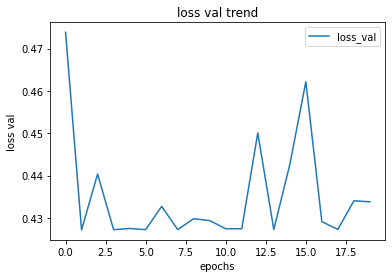

In [ ]:
M2obj_6.loss_val_trend(epochs, loss_val_list)

In [ ]:
print(index_label_prediction_list)

In [ ]:
M2obj_6_submission = get_dataframe(result)

M2obj_6_submission.to_csv('M2obj_6_submission.csv(non-val)', index=False)

## M2obj_7 (DNN Model 2, GPU=True)

- input nodes = 6
> [ [ 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' ] ]
- hidden nodes = 1
- output nodes = 1 (0 or 1)
---
- learning rate = 0.01
- epochs = 40

In [ ]:
input_nodes = training_data.shape[1] - 1
hidden_nodes = 1
output_nodes = 1

learning_rate = 1e-2
epochs = 40

In [ ]:
M2obj_7 = Model2(learning_rate, input_nodes, hidden_nodes, output_nodes)

X = M2obj_7.X
T = M2obj_7.T

loss = M2obj_7.loss_val()

train = M2obj_7.train()

In [ ]:
predicted = M2obj_7.predict()

accuracy = M2obj_7.accuracy()

In [ ]:
result, loss_val_list, index_label_prediction_list = train_session(X, T, loss, train, predicted, accuracy)

epochs =  0 , step =  0 , loss_val =  0.9313883
epochs =  0 , step =  56 , loss_val =  0.70012605
epochs =  0 , step =  112 , loss_val =  0.63168657
epochs =  0 , step =  168 , loss_val =  0.61220944
epochs =  0 , step =  224 , loss_val =  0.5849216
epochs =  0 , step =  280 , loss_val =  0.55262613
epochs =  0 , step =  336 , loss_val =  0.53236496
epochs =  0 , step =  392 , loss_val =  0.51535386
epochs =  0 , step =  448 , loss_val =  0.5002652
epochs =  0 , step =  504 , loss_val =  0.48808202
epochs =  0 , step =  560 , loss_val =  0.4780046
epochs =  1 , step =  0 , loss_val =  0.47767502
epochs =  1 , step =  56 , loss_val =  0.46678764
epochs =  1 , step =  112 , loss_val =  0.4587516
epochs =  1 , step =  168 , loss_val =  0.45245528
epochs =  1 , step =  224 , loss_val =  0.44756132
epochs =  1 , step =  280 , loss_val =  0.44371703
epochs =  1 , step =  336 , loss_val =  0.44079047
epochs =  1 , step =  392 , loss_val =  0.43823045
epochs =  1 , step =  448 , loss_val =  0.

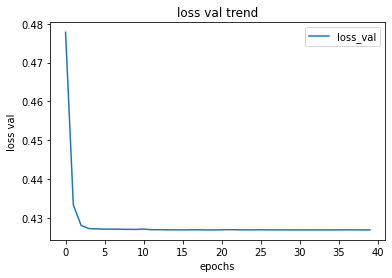

In [ ]:
M2obj_7.loss_val_trend(epochs, loss_val_list)

In [ ]:
print(index_label_prediction_list)

In [ ]:
M2obj_7_submission = get_dataframe(result)

M2obj_7_submission.to_csv('M2obj_7_submission(non-val).csv', index=False)

## M2obj_8 (DNN Model 2, GPU=True)

- input nodes = 6
> [ [ 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' ] ]
- hidden nodes = 1
- output nodes = 1 (0 or 1)
---
- learning rate = 0.01
- epochs = 70

In [ ]:
input_nodes = training_data.shape[1] - 1
hidden_nodes = 1
output_nodes = 1

learning_rate = 1e-2
epochs = 70

In [ ]:
M2obj_8 = Model2(learning_rate, input_nodes, hidden_nodes, output_nodes)

X = M2obj_8.X
T = M2obj_8.T

loss = M2obj_8.loss_val()

train = M2obj_8.train()

In [ ]:
predicted = M2obj_8.predict()

accuracy = M2obj_8.accuracy()

In [ ]:
result, loss_val_list, index_label_prediction_list = train_session(X, T, loss, train, predicted, accuracy)

epochs =  0 , step =  0 , loss_val =  0.7398706
epochs =  0 , step =  56 , loss_val =  0.67442065
epochs =  0 , step =  112 , loss_val =  0.6656178
epochs =  0 , step =  168 , loss_val =  0.61794543
epochs =  0 , step =  224 , loss_val =  0.59977645
epochs =  0 , step =  280 , loss_val =  0.53764045
epochs =  0 , step =  336 , loss_val =  0.47380495
epochs =  0 , step =  392 , loss_val =  0.44839904
epochs =  0 , step =  448 , loss_val =  0.43792242
epochs =  0 , step =  504 , loss_val =  0.4325014
epochs =  0 , step =  560 , loss_val =  0.42963964
epochs =  1 , step =  0 , loss_val =  0.4295689
epochs =  1 , step =  56 , loss_val =  0.4281908
epochs =  1 , step =  112 , loss_val =  0.42751375
epochs =  1 , step =  168 , loss_val =  0.4271901
epochs =  1 , step =  224 , loss_val =  0.42703396
epochs =  1 , step =  280 , loss_val =  0.42696247
epochs =  1 , step =  336 , loss_val =  0.4269215
epochs =  1 , step =  392 , loss_val =  0.42690355
epochs =  1 , step =  448 , loss_val =  0.42

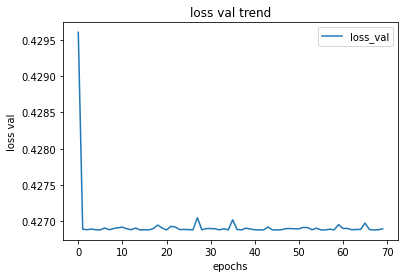

In [ ]:
M2obj_8.loss_val_trend(epochs, loss_val_list)

In [ ]:
print(index_label_prediction_list)

In [ ]:
M2obj_8_submission = get_dataframe(result)

M2obj_8_submission.to_csv('M2obj_8_submission.csv(non-val)', index=False)

## M2obj_9 (DNN Model 2, GPU=True)

- input nodes = 6
> [ [ 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' ] ]
- hidden nodes = 1
- output nodes = 1 (0 or 1)
---
- learning rate = 0.001
- epochs = 100

In [ ]:
input_nodes = training_data.shape[1] - 1
hidden_nodes = 1
output_nodes = 1

learning_rate = 1e-3
epochs = 100

In [ ]:
M2obj_9 = Model2(learning_rate, input_nodes, hidden_nodes, output_nodes)

X = M2obj_9.X
T = M2obj_9.T

loss = M2obj_9.loss_val()

train = M2obj_9.train()

In [ ]:
predicted = M2obj_9.predict()

accuracy = M2obj_9.accuracy()

In [ ]:
result, loss_val_list, index_label_prediction_list = train_session(X, T, loss, train, predicted, accuracy)

epochs =  0 , step =  0 , loss_val =  1.2769372
epochs =  0 , step =  62 , loss_val =  1.2195591
epochs =  0 , step =  124 , loss_val =  1.1618754
epochs =  0 , step =  186 , loss_val =  1.1101301
epochs =  0 , step =  248 , loss_val =  1.050903
epochs =  0 , step =  310 , loss_val =  0.98968464
epochs =  0 , step =  372 , loss_val =  0.9425093
epochs =  0 , step =  434 , loss_val =  0.8877184
epochs =  0 , step =  496 , loss_val =  0.8594722
epochs =  0 , step =  558 , loss_val =  0.84109026
epochs =  0 , step =  620 , loss_val =  0.8255271
epochs =  1 , step =  0 , loss_val =  0.8245782
epochs =  1 , step =  62 , loss_val =  0.8105416
epochs =  1 , step =  124 , loss_val =  0.7976332
epochs =  1 , step =  186 , loss_val =  0.7855759
epochs =  1 , step =  248 , loss_val =  0.7743385
epochs =  1 , step =  310 , loss_val =  0.7640347
epochs =  1 , step =  372 , loss_val =  0.7545963
epochs =  1 , step =  434 , loss_val =  0.74591315
epochs =  1 , step =  496 , loss_val =  0.7379126
epoc

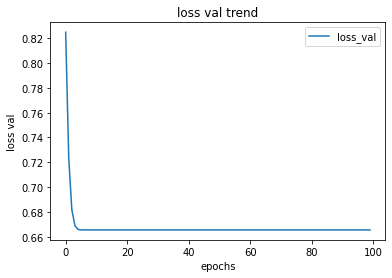

In [ ]:
M2obj_9.loss_val_trend(epochs, loss_val_list)

In [ ]:
print(index_label_prediction_list)

In [ ]:
M2obj_9_submission = get_dataframe(result)

M2obj_9_submission.to_csv('M2obj_9_submission(non-val).csv', index=False)

## M2obj_10 (DNN Model 2, GPU=True)

- input nodes = 6
> [ [ 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' ] ]
- hidden nodes = 1
- output nodes = 1 (0 or 1)
---
- learning rate = 0.0001
- epochs = 100

In [ ]:
input_nodes = training_data.shape[1] - 1
hidden_nodes = 1
output_nodes = 1

learning_rate = 1e-4
epochs = 100

In [ ]:
M2obj_10 = Model2(learning_rate, input_nodes, hidden_nodes, output_nodes)

X = M2obj_10.X
T = M2obj_10.T

loss = M2obj_10.loss_val()

train = M2obj_10.train()

In [ ]:
predicted = M2obj_10.predict()

accuracy = M2obj_10.accuracy()

In [ ]:
result, loss_val_list, index_label_prediction_list = train_session(X, T, loss, train, predicted, accuracy)

epochs =  0 , step =  0 , loss_val =  0.8029492
epochs =  0 , step =  62 , loss_val =  0.8004427
epochs =  0 , step =  124 , loss_val =  0.79791915
epochs =  0 , step =  186 , loss_val =  0.79538983
epochs =  0 , step =  248 , loss_val =  0.7928717
epochs =  0 , step =  310 , loss_val =  0.79039496
epochs =  0 , step =  372 , loss_val =  0.78799677
epochs =  0 , step =  434 , loss_val =  0.78569806
epochs =  0 , step =  496 , loss_val =  0.7835024
epochs =  0 , step =  558 , loss_val =  0.7813847
epochs =  0 , step =  620 , loss_val =  0.77930814
epochs =  1 , step =  0 , loss_val =  0.7791747
epochs =  1 , step =  62 , loss_val =  0.77709955
epochs =  1 , step =  124 , loss_val =  0.7749817
epochs =  1 , step =  186 , loss_val =  0.7727872
epochs =  1 , step =  248 , loss_val =  0.77054495
epochs =  1 , step =  310 , loss_val =  0.7683118
epochs =  1 , step =  372 , loss_val =  0.7660829
epochs =  1 , step =  434 , loss_val =  0.7638762
epochs =  1 , step =  496 , loss_val =  0.761789

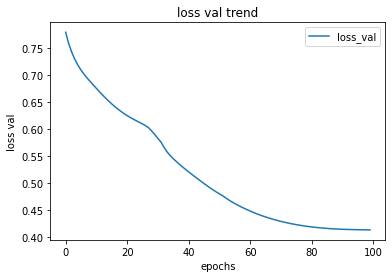

In [ ]:
M2obj_10.loss_val_trend(epochs, loss_val_list)

In [ ]:
print(index_label_prediction_list)

In [ ]:
M2obj_10_submission = get_dataframe(result)

M2obj_10_submission.to_csv('M2obj_10_submission(non-val).csv', index=False)

## DNN Model 3


- number of hidden node = 2
----
- error = Cross Entropy
- optimizer = Adam
----
- loss value trend method = True
- accuracy value trend method = True

In [ ]:
class Model3:

  def __init__(self, learning_rate, input_nodes, hidden_1_nodes, hidden_2_nodes, output_nodes):
    
    self.learning_rate = learning_rate

    self.input_nodes = input_nodes
    self.hidden_1_nodes = hidden_1_nodes
    self.hidden_2_nodes = hidden_2_nodes
    self.output_nodes = output_nodes

    self.X = tf.placeholder(tf.float32, [None, self.input_nodes])  # 7개 입력노드
    self.T = tf.placeholder(tf.float32, [None, self.output_nodes])  # 1개 정답노드

    self.W2 = tf.Variable(tf.random_normal([self.input_nodes, self.hidden_1_nodes]))  # 가중치 노드
    self.b2 = tf.Variable(tf.random_normal([self.hidden_1_nodes]))     # 바이어스 노드

    self.W3 = tf.Variable(tf.random_normal([self.hidden_1_nodes, self.hidden_2_nodes]))  # 가중치 노드
    self.b3 = tf.Variable(tf.random_normal([self.hidden_2_nodes]))     # 바이어스 노드

    self.W4 = tf.Variable(tf.random_normal([self.hidden_2_nodes, self.output_nodes]))
    self.b4 = tf.Variable(tf.random_normal([self.output_nodes]))

    self.Z2 = tf.matmul(self.X, self.W2) + self.b2
    self.A2 = tf.sigmoid(self.Z2)

    self.Z3 = tf.matmul(self.A2, self.W3) + self.b3
    self.A3 = tf.sigmoid(self.Z3)

    self.Z4 = tf.matmul(self.A3, self.W4) + self.b4
    self.A4 = self.y = tf.sigmoid(self.Z4)

    self.optimizer = tf.train.AdamOptimizer(self.learning_rate)

  def __feed_forward(self):
    return -tf.reduce_mean( self.T*tf.log(self.y) + (1-self.T)*tf.log(1-self.y))

  def loss_val(self):
    return -tf.reduce_mean( self.T*tf.log(self.y) + (1-self.T)*tf.log(1-self.y))

  def train(self):
    return self.optimizer.minimize(self.loss_val())

  def loss_val_trend(self, epochs, loss_val_list):
    plt.plot(range(epochs), loss_val_list)
    plt.xlabel('epochs')
    plt.ylabel('loss val')
    plt.title('loss val trend')
    plt.legend(['loss_val'])
    plt.show()

  def accuracy_trend(self, epochs, training_accuracy_list, validation_accuracy_list):
    plt.plot(range(epochs), training_accuracy_list)
    plt.plot(range(epochs), validation_accuracy_list)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.title('overfitting trend')
    plt.legend(['training_accuracy_val', 'validation_accuracy_val'])
    plt.show()

  def predict(self):
    return tf.cast(self.y > 0.5, dtype=tf.float32)

  def accuracy(self):
    return tf.reduce_mean(tf.cast(tf.equal(self.predict(), self.T), dtype=tf.float32))

## M3obj_1 (DNN Model 3, GPU=True)

- input nodes = 6
> [ [ 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' ] ]
- hidden 1 nodes = 20
- hidden 2 nodes = 20
- output nodes = 1 (0 or 1)
---
- learning rate = 0.1
- epochs = 30

In [ ]:
input_nodes = training_data.shape[1] - 1
hidden_1_nodes = 20
hidden_2_nodes = 20
output_nodes = 1

learning_rate = 1e-1
epochs = 30

In [ ]:
M3obj_1 = Model3(learning_rate, input_nodes, hidden_1_nodes, hidden_2_nodes, output_nodes)

X = M3obj_1.X
T = M3obj_1.T

loss = M3obj_1.loss_val()

train = M3obj_1.train()

In [ ]:
predicted = M3obj_1.predict()

accuracy = M3obj_1.accuracy()

In [ ]:
result, loss_val_list, index_label_prediction_list = train_session(X, T, loss, train, predicted, accuracy)

epochs =  0 , step =  0 , loss_val =  0.7452984
epochs =  0 , step =  56 , loss_val =  0.62764275
epochs =  0 , step =  112 , loss_val =  0.5870649
epochs =  0 , step =  168 , loss_val =  0.55458623
epochs =  0 , step =  224 , loss_val =  0.5217676
epochs =  0 , step =  280 , loss_val =  0.47063705
epochs =  0 , step =  336 , loss_val =  0.44626352
epochs =  0 , step =  392 , loss_val =  0.43332565
epochs =  0 , step =  448 , loss_val =  0.42671573
epochs =  0 , step =  504 , loss_val =  nan
epochs =  0 , step =  560 , loss_val =  nan
epochs =  1 , step =  0 , loss_val =  nan
epochs =  1 , step =  56 , loss_val =  nan
epochs =  1 , step =  112 , loss_val =  nan
epochs =  1 , step =  168 , loss_val =  nan
epochs =  1 , step =  224 , loss_val =  nan
epochs =  1 , step =  280 , loss_val =  nan
epochs =  1 , step =  336 , loss_val =  nan
epochs =  1 , step =  392 , loss_val =  nan
epochs =  1 , step =  448 , loss_val =  nan
epochs =  1 , step =  504 , loss_val =  nan
epochs =  1 , step =  

KeyboardInterrupt: ignored

In [ ]:
M3obj_1.loss_val_trend(epochs, loss_val_list)

In [ ]:
print(index_label_prediction_list)

In [ ]:
M3obj_1_submission = get_dataframe(result)

M3obj_1_submission.to_csv('M3obj_1_submission.csv(non-val)', index=False)

## M3obj_2 (DNN Model 3, GPU=True)

- input nodes = 6
> [ [ 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' ] ]
- hidden 1 nodes = 20
- hidden 2 nodes = 20
- output nodes = 1 (0 or 1)
---
- learning rate = 0.01
- epochs = 30

In [ ]:
input_nodes = training_data.shape[1] - 1
hidden_1_nodes = 20
hidden_2_nodes = 20
output_nodes = 1

learning_rate = 1e-2
epochs = 30

In [ ]:
M3obj_2 = Model3(learning_rate, input_nodes, hidden_1_nodes, hidden_2_nodes, output_nodes)

X = M3obj_2.X
T = M3obj_2.T

loss = M3obj_2.loss_val()

train = M3obj_2.train()

In [ ]:
predicted = M3obj_2.predict()

accuracy = M3obj_2.accuracy()

In [ ]:
result, loss_val_list, index_label_prediction_list = train_session(X, T, loss, train, predicted, accuracy)

epochs =  0 , step =  0 , loss_val =  0.63407797
epochs =  0 , step =  56 , loss_val =  0.5441664
epochs =  0 , step =  112 , loss_val =  0.45459098
epochs =  0 , step =  168 , loss_val =  0.39944398
epochs =  0 , step =  224 , loss_val =  0.3736456
epochs =  0 , step =  280 , loss_val =  0.36278346
epochs =  0 , step =  336 , loss_val =  0.35082883
epochs =  0 , step =  392 , loss_val =  0.3415957
epochs =  0 , step =  448 , loss_val =  0.33278245
epochs =  0 , step =  504 , loss_val =  0.32882276
epochs =  0 , step =  560 , loss_val =  0.31863979
epochs =  1 , step =  0 , loss_val =  0.31827474
epochs =  1 , step =  56 , loss_val =  0.30898628
epochs =  1 , step =  112 , loss_val =  0.30216673
epochs =  1 , step =  168 , loss_val =  0.29635376
epochs =  1 , step =  224 , loss_val =  0.2904354
epochs =  1 , step =  280 , loss_val =  0.28486374
epochs =  1 , step =  336 , loss_val =  nan
epochs =  1 , step =  392 , loss_val =  nan
epochs =  1 , step =  448 , loss_val =  nan
epochs =  1

KeyboardInterrupt: ignored

In [ ]:
M3obj_2.loss_val_trend(epochs, loss_val_list)

In [ ]:
print(index_label_prediction_list)

In [ ]:
M3obj_2_submission = get_dataframe(result)

M3obj_2_submission.to_csv('M3obj_2_submission(non-val).csv', index=False)

## M3obj_3 (DNN Model 3, GPU=True)

- input nodes = 6
> [ [ 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' ] ]
- hidden 1 nodes = 10
- hidden 2 nodes = 10
- output nodes = 1 (0 or 1)
---
- learning rate = 0.001
- epochs = 25

In [ ]:
input_nodes = training_data.shape[1] - 1
hidden_1_nodes = 10
hidden_2_nodes = 10
output_nodes = 1

learning_rate = 1e-3
epochs = 30

In [ ]:
M3obj_3 = Model3(learning_rate, input_nodes, hidden_1_nodes, hidden_2_nodes, output_nodes)

X = M3obj_3.X
T = M3obj_3.T

loss = M3obj_3.loss_val()

train = M3obj_3.train()

In [ ]:
predicted = M3obj_3.predict()

accuracy = M3obj_3.accuracy()

In [ ]:
result, loss_val_list, index_label_prediction_list = train_session(X, T, loss, train, predicted, accuracy)

epochs =  0 , step =  0 , loss_val =  0.904014
epochs =  0 , step =  56 , loss_val =  0.76602596
epochs =  0 , step =  112 , loss_val =  0.6794163
epochs =  0 , step =  168 , loss_val =  0.6171689
epochs =  0 , step =  224 , loss_val =  0.6086544
epochs =  0 , step =  280 , loss_val =  0.6039599
epochs =  0 , step =  336 , loss_val =  0.6008813
epochs =  0 , step =  392 , loss_val =  0.59822506
epochs =  0 , step =  448 , loss_val =  0.5957076
epochs =  0 , step =  504 , loss_val =  0.5929446
epochs =  0 , step =  560 , loss_val =  0.58779484
epochs =  1 , step =  0 , loss_val =  0.5874559
epochs =  1 , step =  56 , loss_val =  0.5678946
epochs =  1 , step =  112 , loss_val =  0.55629086
epochs =  1 , step =  168 , loss_val =  0.54450935
epochs =  1 , step =  224 , loss_val =  0.5310422
epochs =  1 , step =  280 , loss_val =  0.5174609
epochs =  1 , step =  336 , loss_val =  0.50333256
epochs =  1 , step =  392 , loss_val =  0.48753086
epochs =  1 , step =  448 , loss_val =  0.46801764

KeyboardInterrupt: ignored

In [ ]:
M3obj_3.loss_val_trend(epochs, loss_val_list)

In [ ]:
print(index_label_prediction_list)

In [ ]:
M3obj_3_submission = get_dataframe(result)

M3obj_3_submission.to_csv('M3obj_3_submission(non-val).csv', index=False)

## M3obj_4 (DNN Model 3, GPU=True)

- input nodes = 6
> [ [ 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' ] ]
- hidden 1 nodes = 20
- hidden 2 nodes = 20
- output nodes = 1 (0 or 1)
---
- learning rate = 0.0001
- epochs = 150

In [ ]:
input_nodes = training_data.shape[1] - 1
hidden_1_nodes = 20
hidden_2_nodes = 20
output_nodes = 1

learning_rate = 1e-4
epochs = 150

In [ ]:
M3obj_4 = Model3(learning_rate, input_nodes, hidden_1_nodes, hidden_2_nodes, output_nodes)

X = M3obj_4.X
T = M3obj_4.T

loss = M3obj_4.loss_val()

train = M3obj_4.train()

In [ ]:
predicted = M3obj_4.predict()

accuracy = M3obj_4.accuracy()

In [ ]:
result, loss_val_list, index_label_prediction_list = train_session(X, T, loss, train, predicted, accuracy)

epochs =  0 , step =  0 , loss_val =  0.6778294
epochs =  0 , step =  56 , loss_val =  0.6724624
epochs =  0 , step =  112 , loss_val =  0.6713077
epochs =  0 , step =  168 , loss_val =  0.6708067
epochs =  0 , step =  224 , loss_val =  0.6703055
epochs =  0 , step =  280 , loss_val =  0.6697846
epochs =  0 , step =  336 , loss_val =  0.66924596
epochs =  0 , step =  392 , loss_val =  0.6686905
epochs =  0 , step =  448 , loss_val =  0.66811866
epochs =  0 , step =  504 , loss_val =  0.66753054
epochs =  0 , step =  560 , loss_val =  0.6669258
epochs =  1 , step =  0 , loss_val =  0.6669039
epochs =  1 , step =  56 , loss_val =  0.66628116
epochs =  1 , step =  112 , loss_val =  0.6656405
epochs =  1 , step =  168 , loss_val =  0.664981
epochs =  1 , step =  224 , loss_val =  0.664302
epochs =  1 , step =  280 , loss_val =  0.6636026
epochs =  1 , step =  336 , loss_val =  0.6628823
epochs =  1 , step =  392 , loss_val =  0.66214085
epochs =  1 , step =  448 , loss_val =  0.661378
epoc

KeyboardInterrupt: ignored

In [ ]:
M3obj_4.loss_val_trend(epochs, loss_val_list)

In [ ]:
print(index_label_prediction_list)

In [ ]:
M3obj_4_submission = get_dataframe(result)

M3obj_4_submission.to_csv('M3obj_4_submission(non-val).csv', index=False)

## M3obj_5 (DNN Model 3, GPU=True)

- input nodes = 6
> [ [ 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' ] ]
- hidden 1 nodes = 20
- hidden 2 nodes = 20
- output nodes = 1 (0 or 1)
---
- learning rate = 0.0001
- epochs = 100

In [ ]:
input_nodes = training_data.shape[1] - 1
hidden_1_nodes = 20
hidden_2_nodes = 20
output_nodes = 1

learning_rate = 1e-4
epochs = 100

In [ ]:
M3obj_5 = Model3(learning_rate, input_nodes, hidden_1_nodes, hidden_2_nodes, output_nodes)

X = M3obj_5.X
T = M3obj_5.T

loss = M3obj_5.loss_val()

train = M3obj_5.train()

In [ ]:
predicted = M3obj_5.predict()

accuracy = M3obj_5.accuracy()

In [ ]:
result, loss_val_list, index_label_prediction_list = train_session(X, T, loss, train, predicted, accuracy)

epochs =  0 , step =  0 , loss_val =  2.1686978
epochs =  0 , step =  56 , loss_val =  2.06313
epochs =  0 , step =  112 , loss_val =  1.9563041
epochs =  0 , step =  168 , loss_val =  1.8484088
epochs =  0 , step =  224 , loss_val =  1.7406818
epochs =  0 , step =  280 , loss_val =  1.6350683
epochs =  0 , step =  336 , loss_val =  1.533451
epochs =  0 , step =  392 , loss_val =  1.4371488
epochs =  0 , step =  448 , loss_val =  1.3468583
epochs =  0 , step =  504 , loss_val =  1.2630036
epochs =  0 , step =  560 , loss_val =  1.1856894
epochs =  1 , step =  0 , loss_val =  1.1830472
epochs =  1 , step =  56 , loss_val =  1.1123044
epochs =  1 , step =  112 , loss_val =  1.0476694
epochs =  1 , step =  168 , loss_val =  0.9889711
epochs =  1 , step =  224 , loss_val =  0.93608934
epochs =  1 , step =  280 , loss_val =  0.88884467
epochs =  1 , step =  336 , loss_val =  0.8469114
epochs =  1 , step =  392 , loss_val =  0.80991215
epochs =  1 , step =  448 , loss_val =  0.7776813
epochs

KeyboardInterrupt: ignored

In [ ]:
M3obj_5.loss_val_trend(epochs, loss_val_list)

In [ ]:
print(index_label_prediction_list)

In [ ]:
M3obj_5_submission = get_dataframe(result)

M3obj_5_submission.to_csv('M3obj_5_submission(non-val).csv', index=False)

## DNN Model 4


- number of hidden node = 1
----
- error = MSE
- optimizer = Adam
----
- loss value trend method = True
- accuracy value trend method = True

In [ ]:
class Model4:

  def __init__(self, learning_rate, input_nodes, hidden_nodes, output_nodes):
    
    self.learning_rate = learning_rate

    self.input_nodes = input_nodes
    self.hidden_nodes = hidden_nodes
    self.output_nodes = output_nodes

    self.X = tf.placeholder(tf.float32, [None, self.input_nodes])  # 7개 입력노드
    self.T = tf.placeholder(tf.float32, [None, self.output_nodes])  # 1개 정답노드

    self.W2 = tf.Variable(tf.random_normal([self.input_nodes, self.hidden_nodes]))  # 가중치 노드
    self.b2 = tf.Variable(tf.random_normal([self.hidden_nodes]))     # 바이어스 노드

    self.W3 = tf.Variable(tf.random_normal([self.hidden_nodes, self.output_nodes]))  # 가중치 노드
    self.b3 = tf.Variable(tf.random_normal([self.output_nodes]))     # 바이어스 노드

    self.z2 = tf.matmul(self.X, self.W2) + self.b2
    self.a2 = tf.sigmoid(self.z2)

    self.z3 = tf.matmul(self.a2, self.W3) + self.b3
    self.a3 = self.y = tf.sigmoid(self.z3)

    self.optimizer = tf.train.AdamOptimizer(self.learning_rate)

  def __feed_forward(self):
    return tf.reduce_mean(tf.square(self.T - self.y))

  def loss_val(self):
    return tf.reduce_mean(tf.square(self.T - self.y))

  def train(self):
    return self.optimizer.minimize(self.loss_val())

  def loss_val_trend(self, epochs, loss_val_list):
    plt.plot(range(epochs), loss_val_list)
    plt.xlabel('epochs')
    plt.ylabel('loss val')
    plt.title('loss val trend')
    plt.legend(['loss_val'])
    plt.show()

  def accuracy_trend(self, epochs, training_accuracy_list, validation_accuracy_list):
    plt.plot(range(epochs), training_accuracy_list)
    plt.plot(range(epochs), validation_accuracy_list)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.title('overfitting trend')
    plt.legend(['training_accuracy_val', 'validation_accuracy_val'])
    plt.show()

  def predict(self):
    return tf.cast(self.y > 0.5, dtype=tf.float32)

  def accuracy(self):
    return tf.reduce_mean(tf.cast(tf.equal(self.predict(), self.T), dtype=tf.float32))

## M4obj_1 (DNN Model 4, GPU=True)

- input nodes = 6
> [ [ 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' ] ]
- hidden nodes = 100
- output nodes = 1 (0 or 1)
---
- learning rate = 0.1
- epochs = 100

In [ ]:
input_nodes = training_data.shape[1] - 1
hidden_nodes = 100
output_nodes = 1

learning_rate = 1e-1
epochs = 100

In [ ]:
M4obj_1 = Model4(learning_rate, input_nodes, hidden_nodes, output_nodes)

X = M4obj_1.X
T = M4obj_1.T

loss = M4obj_1.loss_val()

train = M4obj_1.train()

In [ ]:
predicted = M4obj_1.predict()

accuracy = M4obj_1.accuracy()

In [ ]:
result, loss_val_list, index_label_prediction_list = train_session(X, T, loss, train, predicted, accuracy)

epochs =  0 , step =  0 , loss_val =  0.38323238
epochs =  0 , step =  56 , loss_val =  0.38790035
epochs =  0 , step =  112 , loss_val =  0.38790035
epochs =  0 , step =  168 , loss_val =  0.38790035
epochs =  0 , step =  224 , loss_val =  0.38790035
epochs =  0 , step =  280 , loss_val =  0.38790035
epochs =  0 , step =  336 , loss_val =  0.38790035
epochs =  0 , step =  392 , loss_val =  0.38790035
epochs =  0 , step =  448 , loss_val =  0.38790035
epochs =  0 , step =  504 , loss_val =  0.38790035
epochs =  0 , step =  560 , loss_val =  0.38790035
epochs =  1 , step =  0 , loss_val =  0.38790035
epochs =  1 , step =  56 , loss_val =  0.38790035
epochs =  1 , step =  112 , loss_val =  0.38790035
epochs =  1 , step =  168 , loss_val =  0.38790035
epochs =  1 , step =  224 , loss_val =  0.38790035
epochs =  1 , step =  280 , loss_val =  0.38790035
epochs =  1 , step =  336 , loss_val =  0.38790035
epochs =  1 , step =  392 , loss_val =  0.38790035
epochs =  1 , step =  448 , loss_val 

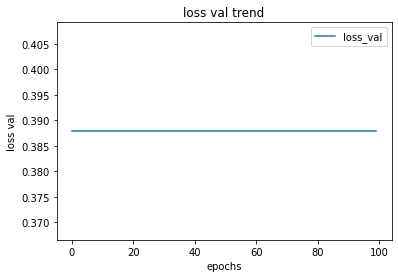

In [ ]:
M4obj_1.loss_val_trend(epochs, loss_val_list)

In [ ]:
print(index_label_prediction_list)

In [ ]:
M4obj_1_submission = get_dataframe(result)

M4obj_1_submission.to_csv('M4obj_1_submission(non-val).csv', index=False)

## DNN Model 5


- number of hidden node = 1
----
- error = MSE
- optimizer = Gredient Descent
----
- loss value trend method = True
- accuracy value trend method = True

In [ ]:
class Model5:

  def __init__(self, learning_rate, input_nodes, hidden_nodes, output_nodes):
    
    self.learning_rate = learning_rate

    self.input_nodes = input_nodes
    self.hidden_nodes = hidden_nodes
    self.output_nodes = output_nodes

    self.X = tf.placeholder(tf.float32, [None, self.input_nodes])  # 7개 입력노드
    self.T = tf.placeholder(tf.float32, [None, self.output_nodes])  # 1개 정답노드

    self.W2 = tf.Variable(tf.random_normal([self.input_nodes, self.hidden_nodes]))  # 가중치 노드
    self.b2 = tf.Variable(tf.random_normal([self.hidden_nodes]))     # 바이어스 노드

    self.W3 = tf.Variable(tf.random_normal([self.hidden_nodes, self.output_nodes]))  # 가중치 노드
    self.b3 = tf.Variable(tf.random_normal([self.output_nodes]))     # 바이어스 노드

    self.z2 = tf.matmul(self.X, self.W2) + self.b2
    self.a2 = tf.sigmoid(self.z2)

    self.z3 = tf.matmul(self.a2, self.W3) + self.b3
    self.a3 = self.y = tf.sigmoid(self.z3)

    self.optimizer = tf.train.GradientDescentOptimizer(self.learning_rate)

  def __feed_forward(self):
    return tf.reduce_mean(tf.square(self.T - self.y))

  def loss_val(self):
    return tf.reduce_mean(tf.square(self.T - self.y))

  def train(self):
    return self.optimizer.minimize(self.loss_val())

  def loss_val_trend(self, epochs, loss_val_list):
    plt.plot(range(epochs), loss_val_list)
    plt.xlabel('epochs')
    plt.ylabel('loss val')
    plt.title('loss val trend')
    plt.legend(['loss_val'])
    plt.show()

  def accuracy_trend(self, epochs, training_accuracy_list, validation_accuracy_list):
    plt.plot(range(epochs), training_accuracy_list)
    plt.plot(range(epochs), validation_accuracy_list)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.title('overfitting trend')
    plt.legend(['training_accuracy_val', 'validation_accuracy_val'])
    plt.show()

  def predict(self):
    return tf.cast(self.y > 0.5, dtype=tf.float32)

  def accuracy(self):
    return tf.reduce_mean(tf.cast(tf.equal(self.predict(), self.T), dtype=tf.float32))

## M5obj_1 (DNN Model 5, GPU=True)

- input nodes = 6
> [ [ 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' ] ]
- hidden nodes = 100
- output nodes = 1 (0 or 1)
---
- learning rate = 0.1
- epochs = 30

In [ ]:
input_nodes = training_data.shape[1] - 1
hidden_nodes = 100
output_nodes = 1

learning_rate = 1e-1
epochs = 30

In [ ]:
M5obj_1 = Model5(learning_rate, input_nodes, hidden_nodes, output_nodes)

X = M5obj_1.X
T = M5obj_1.T

loss = M5obj_1.loss_val()

train = M5obj_1.train()

In [ ]:
predicted = M5obj_1.predict()

accuracy = M5obj_1.accuracy()

In [ ]:
result, loss_val_list, index_label_prediction_list = train_session(X, T, loss, train, predicted, accuracy)

epochs =  0 , step =  0 , loss_val =  0.4233709
epochs =  0 , step =  56 , loss_val =  0.26676655
epochs =  0 , step =  112 , loss_val =  0.2647653
epochs =  0 , step =  168 , loss_val =  0.26264063
epochs =  0 , step =  224 , loss_val =  0.26037
epochs =  0 , step =  280 , loss_val =  0.25792658
epochs =  0 , step =  336 , loss_val =  0.25528008
epochs =  0 , step =  392 , loss_val =  0.25240058
epochs =  0 , step =  448 , loss_val =  0.2492686
epochs =  0 , step =  504 , loss_val =  0.2458965
epochs =  0 , step =  560 , loss_val =  0.24235955
epochs =  1 , step =  0 , loss_val =  0.24223195
epochs =  1 , step =  56 , loss_val =  0.238694
epochs =  1 , step =  112 , loss_val =  0.23537788
epochs =  1 , step =  168 , loss_val =  0.232474
epochs =  1 , step =  224 , loss_val =  0.23006895
epochs =  1 , step =  280 , loss_val =  0.2281426
epochs =  1 , step =  336 , loss_val =  0.22661644
epochs =  1 , step =  392 , loss_val =  0.2254005
epochs =  1 , step =  448 , loss_val =  0.22441702

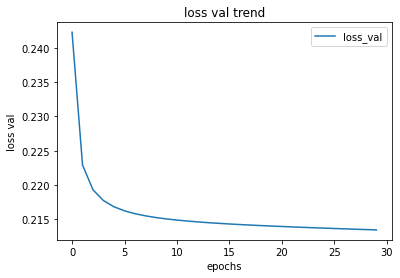

In [ ]:
M5obj_1.loss_val_trend(epochs, loss_val_list)

In [ ]:
index_label_prediction_list

In [ ]:
M5obj_1_submission = get_dataframe(result)

M5obj_1_submission.to_csv('M5obj_1_submission.csv(non-val)', index=False)